In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_1samp, shapiro
from sklearn.feature_selection import chi2

In [1]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import recall_score, make_scorer, roc_auc_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

# **Dataset Loading**

In [ ]:
from google.colab import files
files.upload()

Saving data_cardiovascular_risk(1).csv to data_cardiovascular_risk(1).csv


{'data_cardiovascular_risk(1).csv': b'id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD\r\n0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,,90.0,80.0,1\r\n1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0\r\n2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0\r\n3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1\r\n4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0\r\n5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.8,85.0,65.0,1\r\n6,61,1.0,M,NO,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0\r\n7,36,4.0,M,YES,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0\r\n8,41,2.0,F,YES,20.0,,0,0,0,220.0,126.0,78.0,20.7,86.0,79.0,0\r\n9,55,2.0,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,,0\r\n10,61,1.0,F,NO,0.0,0.0,0,1,0,,185.0,121.0,35.22,80.0,,0\r\n11,53,2.0,F,NO,0.0,0.0,0,0,0,210.0,138.0,86.5,22.49,88.0,87.0,0\r\n12,43,2.0,F,NO,0.0,0.0,0,0,0,213.

# **Dataset First Look**

In [ ]:
df= pd.read_csv('data_cardiovascular_risk(1).csv')
df.head(15)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
6,6,61,1.0,M,NO,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0
7,7,36,4.0,M,YES,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0
8,8,41,2.0,F,YES,20.0,NaN,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0
9,9,55,2.0,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,NaN,0


In [ ]:
print(f'Number of rows in the dataset: {df.shape[0]}')
print(f'Number of columns  in the dataset: {df.shape[1]}')

Number of rows in the dataset: 3390
Number of columns  in the dataset: 17


# **Dataset Information**

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
print(f'Number of duplicated rows in the dataset: {df.duplicated().sum()}')

Number of duplicated rows in the dataset: 0


In [ ]:
df['id'].duplicated().sum()

0

# **Missing Values**

In [ ]:
print(f'There are {df.isna().sum().sum()} missing values in the dataset\n')
df.isna().sum()


There are 510 missing values in the dataset



id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

<Axes: >

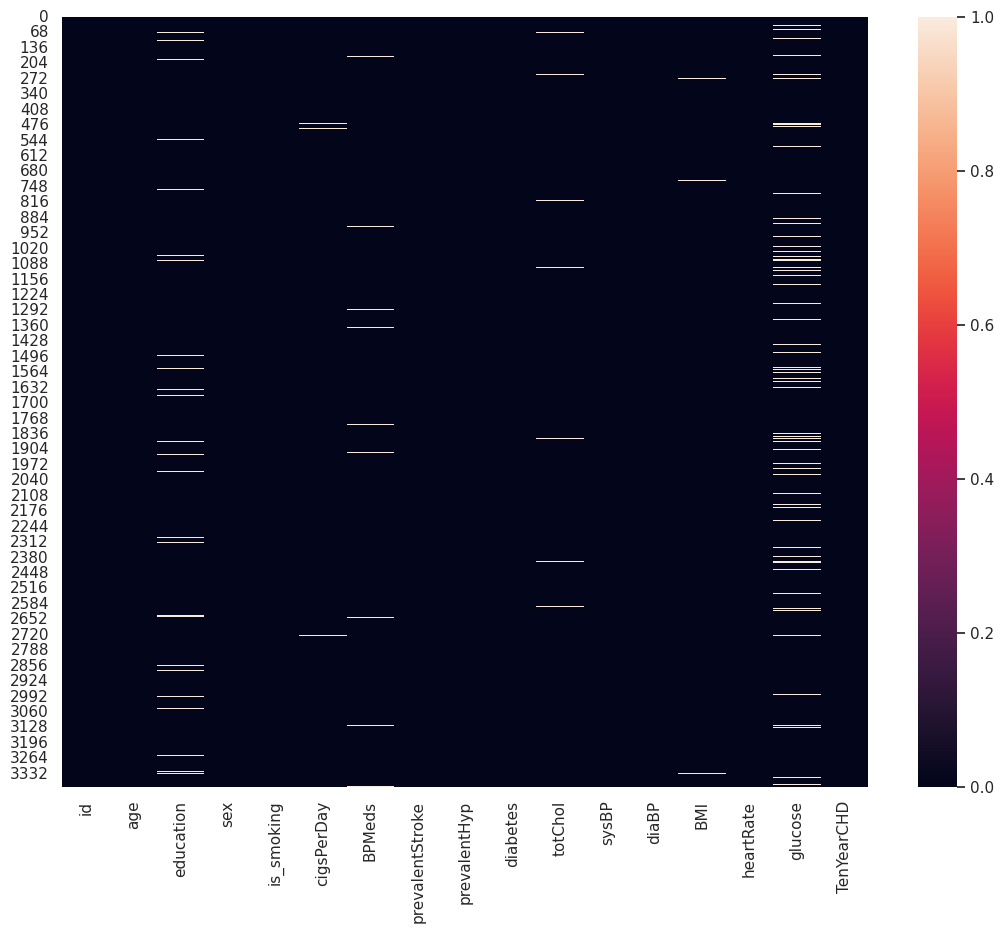

In [ ]:
plt.figure(figsize=(13, 10))
sns.heatmap(df.isna())

# **Dataset Columns**

In [ ]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


# **Check Unique Values for each variable**

In [ ]:
categ_vars = ['sex', 'education', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
cont_vars = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

In [ ]:
for var in categ_vars:
  print(f'Unique values in {var} are: {df[var].dropna().unique()})')

Unique values in sex are: ['F' 'M'])
Unique values in education are: [2. 4. 1. 3.])
Unique values in is_smoking are: ['YES' 'NO'])
Unique values in BPMeds are: [0. 1.])
Unique values in prevalentStroke are: [0 1])
Unique values in prevalentHyp are: [0 1])
Unique values in diabetes are: [0 1])


# **Data Vizualization**

**Distribution of Continuous Independent features**

In [ ]:
sns.set()

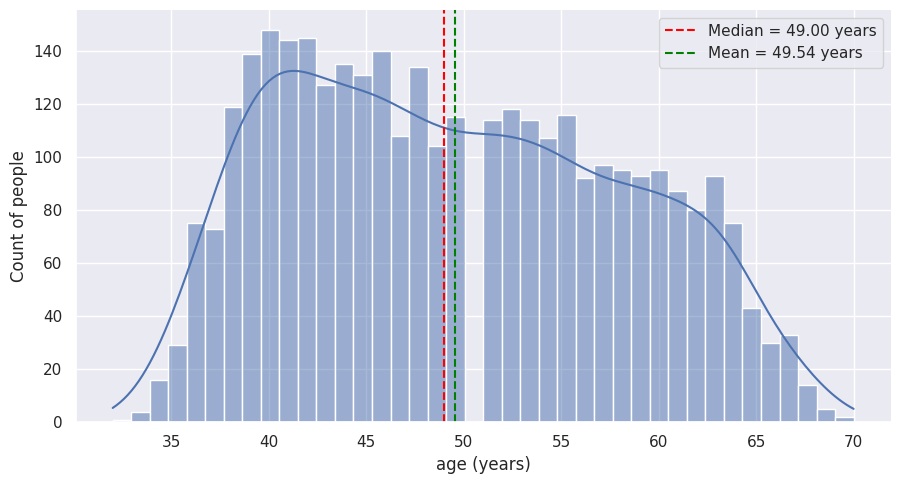

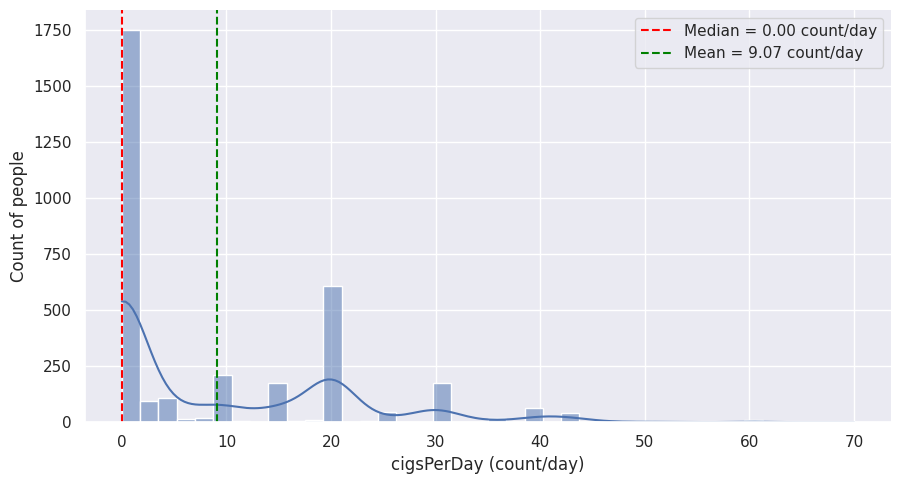

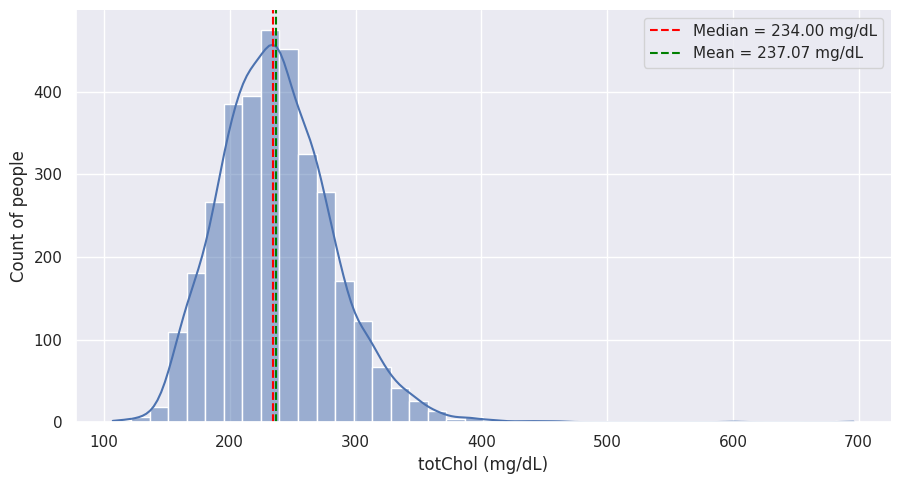

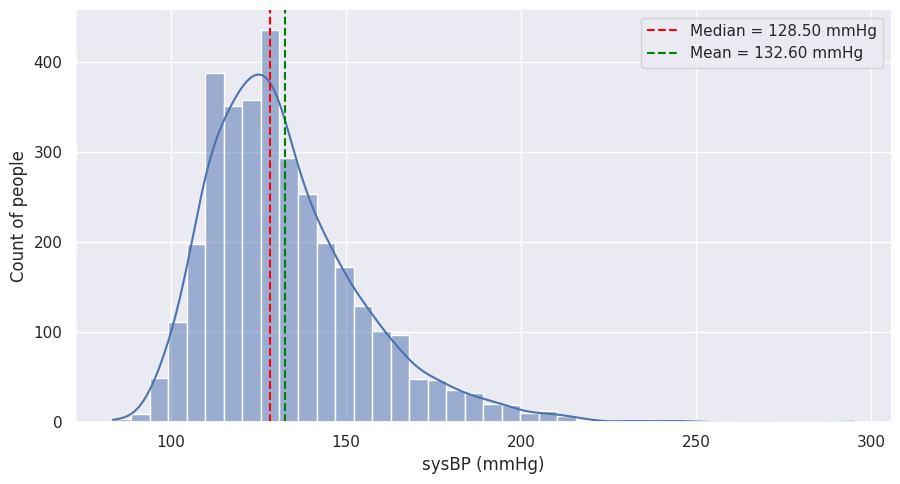

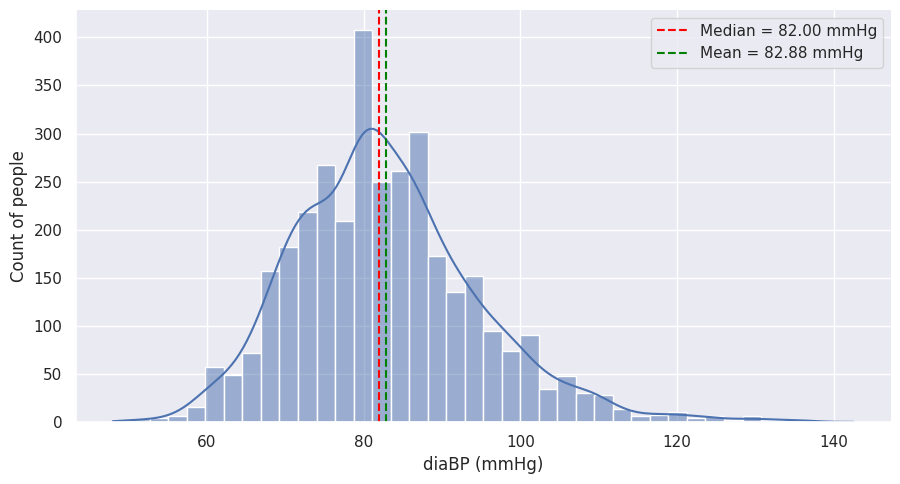

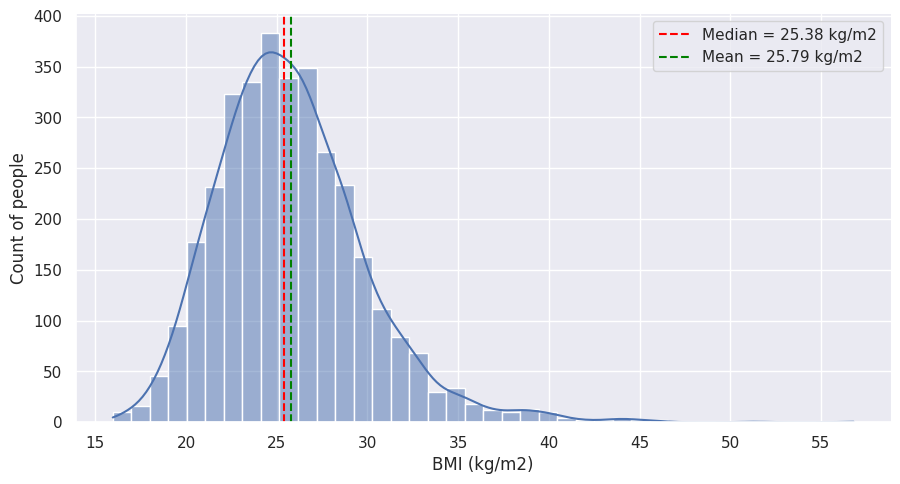

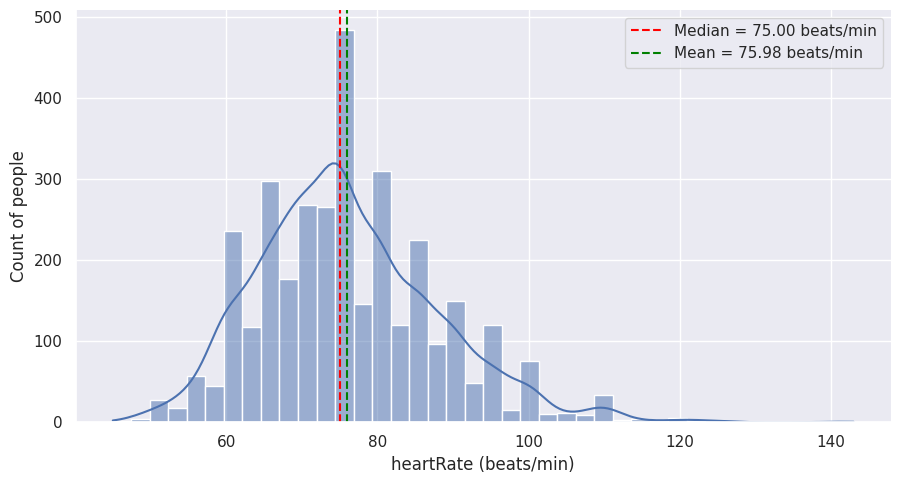

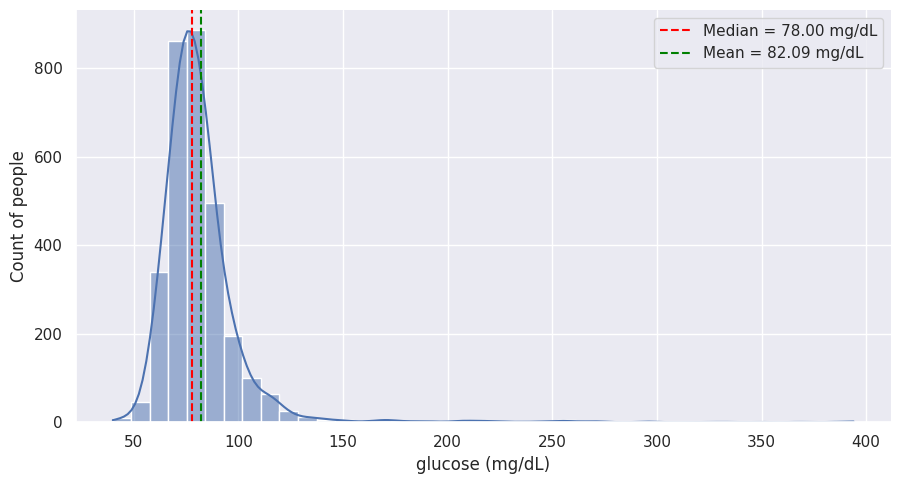

In [ ]:
# Function for Plotting the continuous variable distribution
def displot_with_median(dataset, variable, median = False, mean = False, unit = None):
  '''A displot with median and mean and the appropriate units (if any) as the inputs'''
  sns.displot(dataset[variable], height = 5, aspect = 11/6, bins = 40, kde = True)
  if median == True:
    plt.axvline(dataset[variable].median(), color = 'red', linestyle = '--', label = f'Median = {dataset[variable].median():.2f} {unit}')
  if mean == True:
    plt.axvline(dataset[variable].mean(), color = 'green', linestyle = '--', label = f'Mean = {dataset[variable].mean():.2f} {unit}')
  plt.ylabel('Count of people')
  plt.xlabel(var + f' ({unit})')
  plt.legend()
  plt.show()


units = ['years', 'count/day', 'mg/dL', 'mmHg', 'mmHg', 'kg/m2', 'beats/min', 'mg/dL']
cont_var_units = dict(zip(cont_vars, units))


for var in cont_var_units:
  displot_with_median(df, var, median = True, mean = True, unit = cont_var_units[var])

**Distribution of Discrete Independent features**

In [ ]:
def display_vals(axis, round_ = 2):
  '''Displays the data value on the chart'''
  for p in axis.patches:
   axis.annotate(str(round(p.get_height(), round_)), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',)

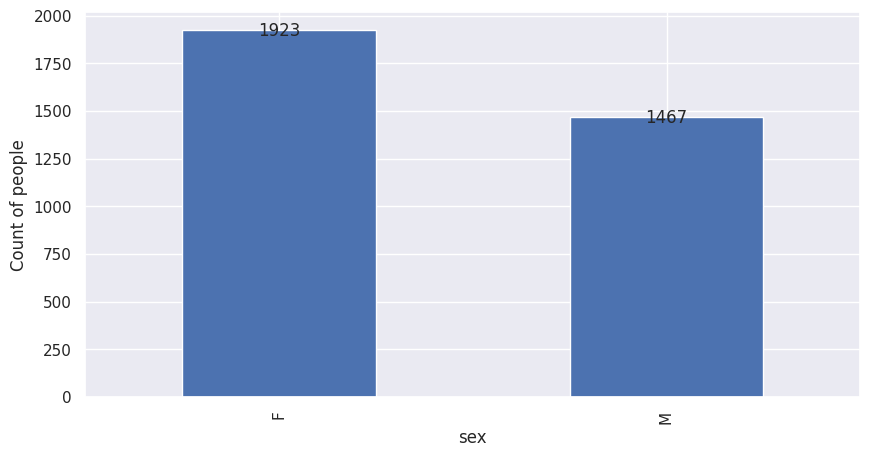

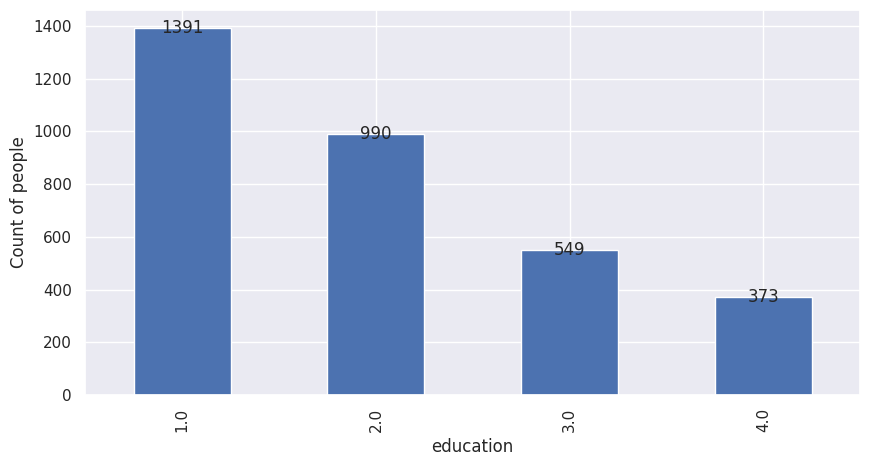

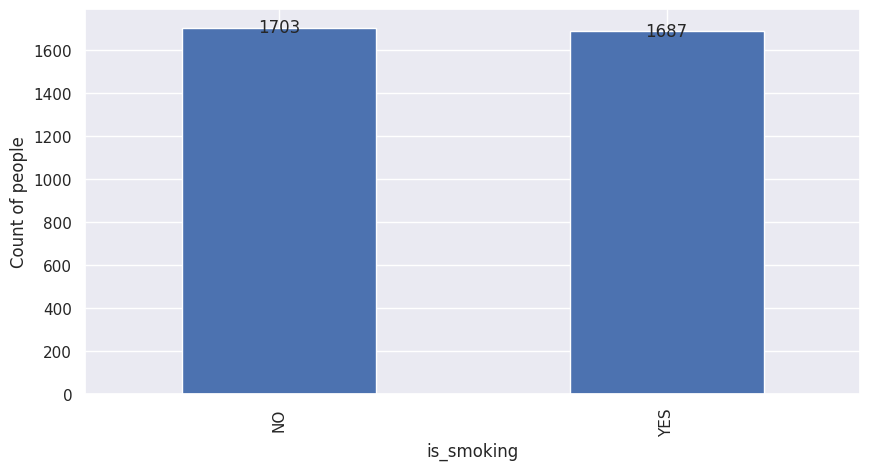

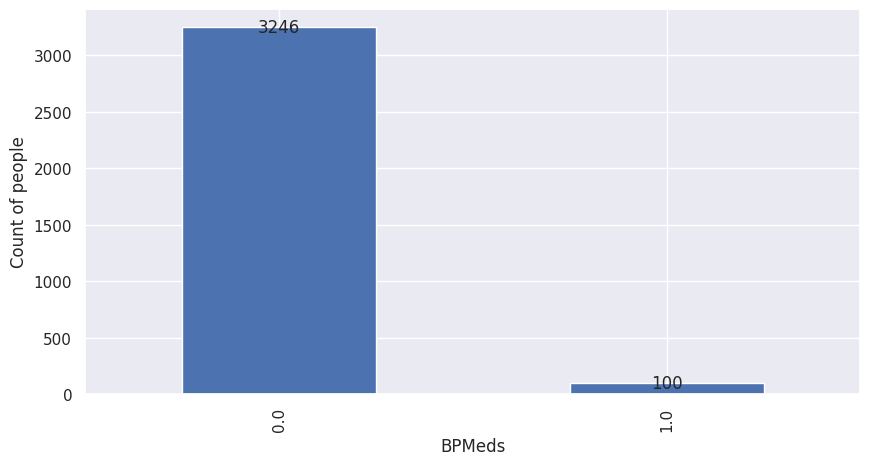

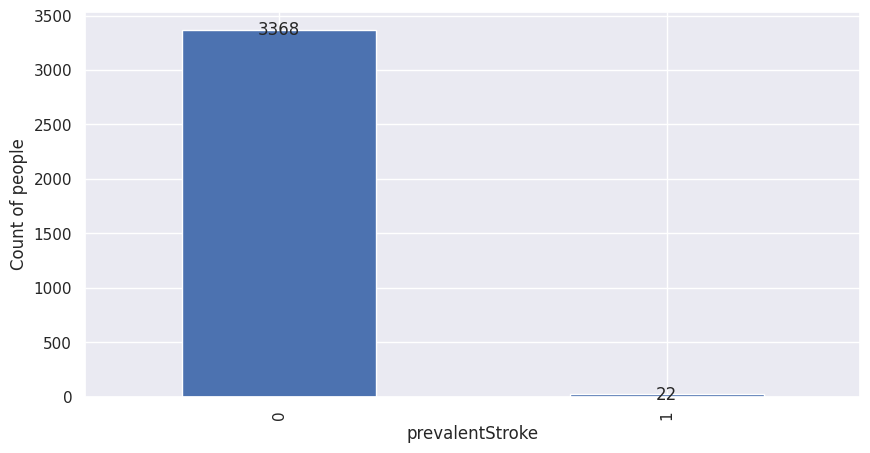

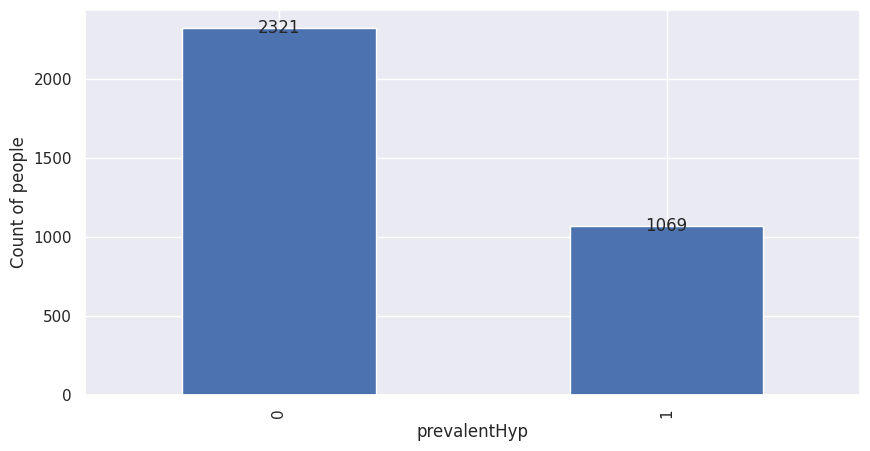

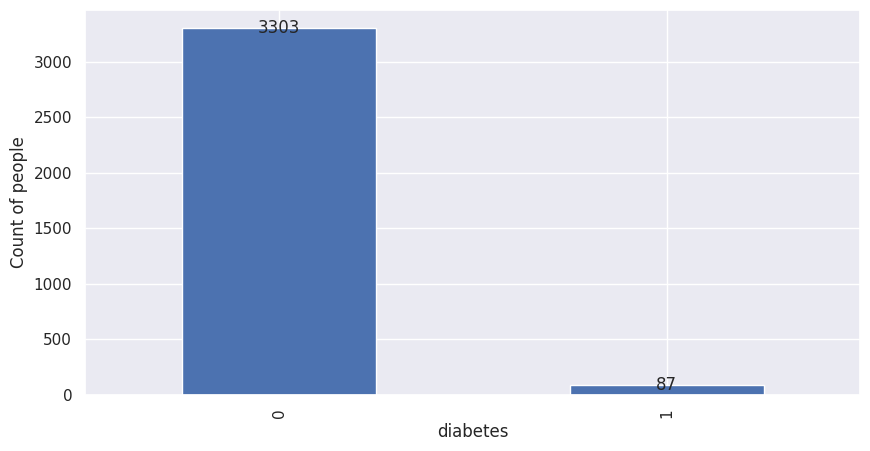

In [ ]:
for var in categ_vars:
  plt.figure(figsize = (10, 5))
  ax = df[var].value_counts().plot(kind = 'bar')
  plt.ylabel('Count of people')
  plt.xlabel(var)
  display_vals(ax)

**Distribution of the Dependent variable to be predicted**

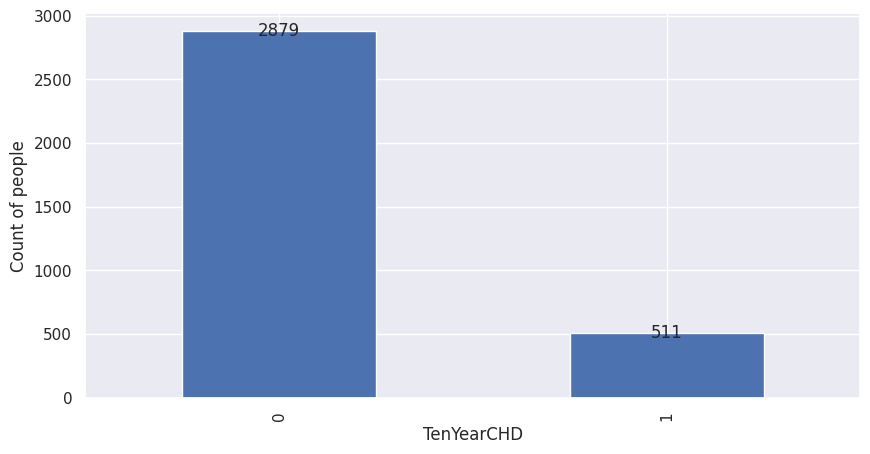

In [ ]:
var ='TenYearCHD'
plt.figure(figsize = (10, 5))
ax = df[var].value_counts().plot(kind = 'bar')
plt.ylabel('Count of people')
plt.xlabel(var)
display_vals(ax)

In [ ]:
def bivariate_discrete_plot(dataset, variable, legend, size):
  '''Plots both the count plot and "proportion" plot - the latter of which displays percentage
  of people in the classes of "legend" variable in each class of the variable in x-axis'''


  counts = dataset.groupby([variable, legend], as_index = False)['id'].count()
  props = pd.merge(counts.groupby(variable)['id'].sum(), counts, on = variable)
  props['proportion'] = props['id_y']*100/props['id_x']


  fig, axes = plt.subplots(1, 2, figsize = size)

  ax1 = sns.barplot(data = props, x = variable, y = 'proportion', hue = legend, ax = axes[0])
  ax1.legend_.remove()
  ax1.set(ylabel = 'Proportion of people (%)')
  display_vals(ax1)

  ax2 = sns.barplot(data = counts, x = variable, y = 'id', hue = legend, ax = axes[1])
  ax2.set(ylabel = 'Count of People')
  sns.move_legend(ax2, "lower center", bbox_to_anchor = (1.15, 0.4), title = legend, handlelength = 2.5)
  display_vals(ax2)

  plt.tight_layout()
  plt.show()

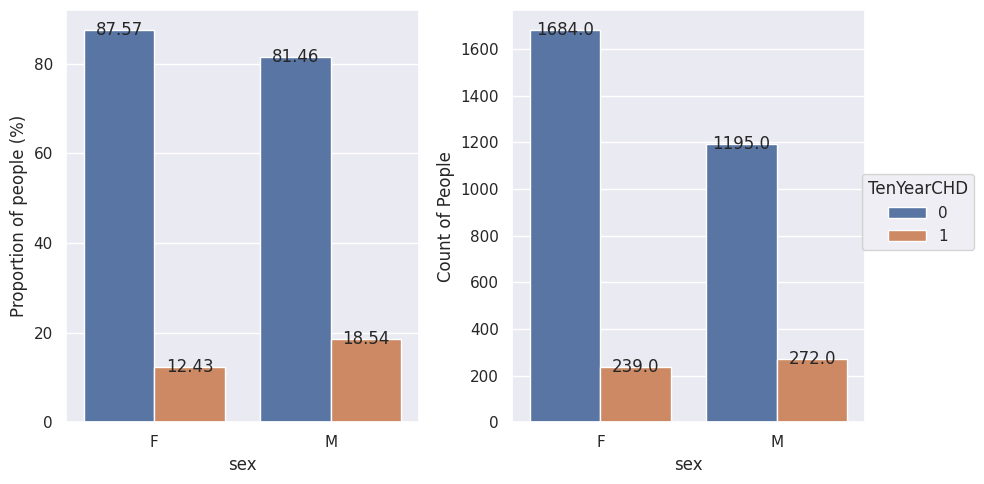

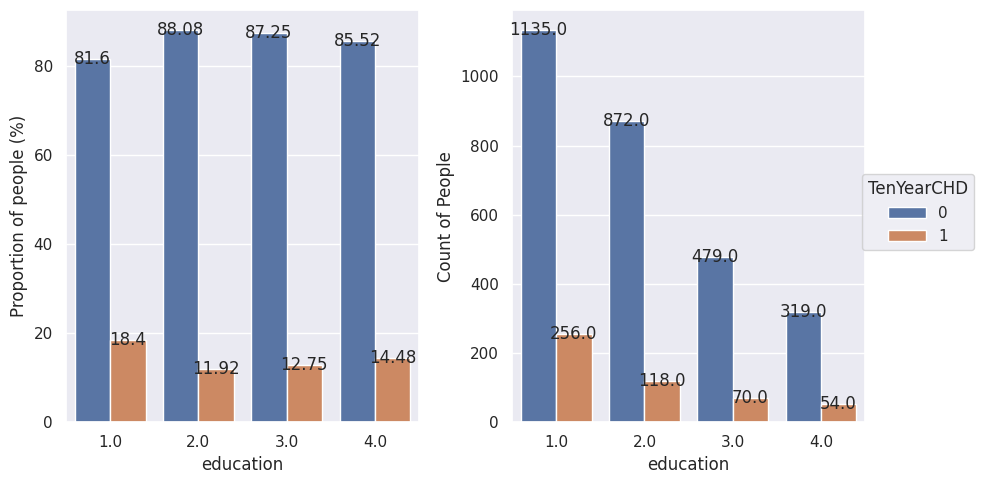

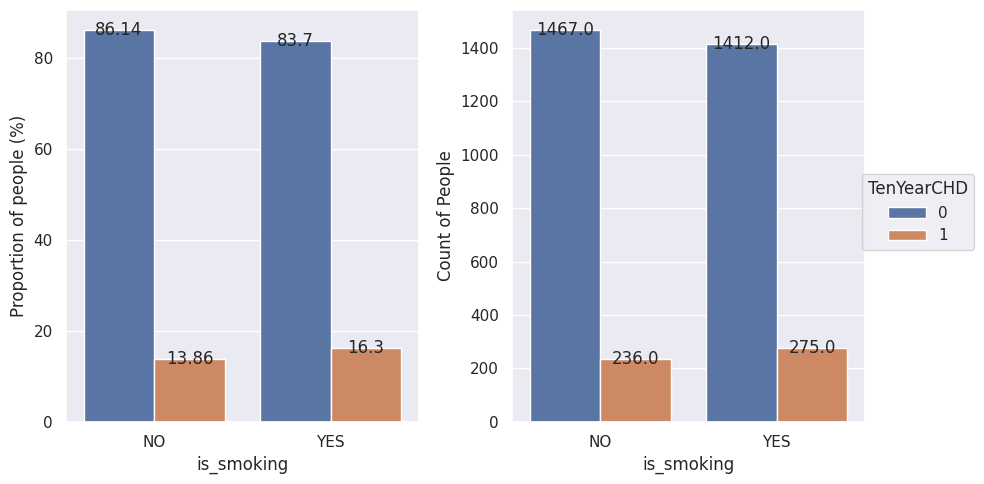

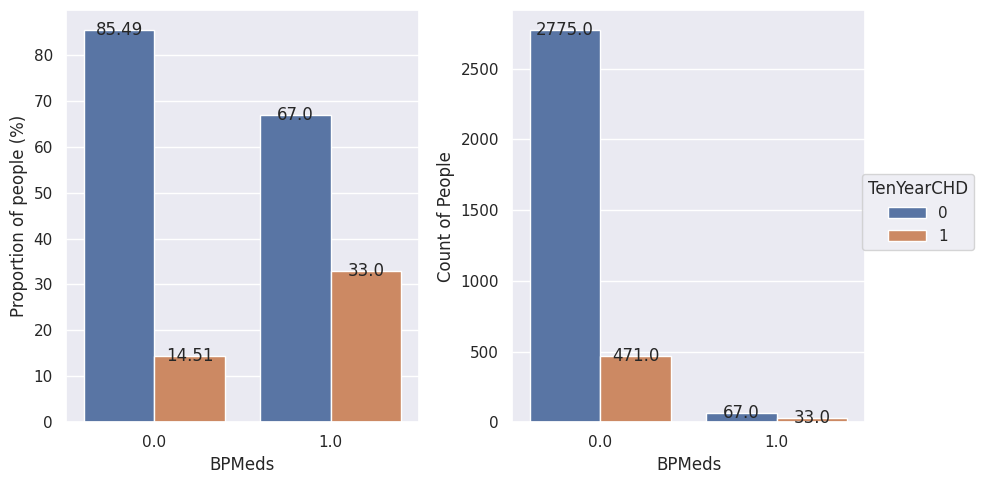

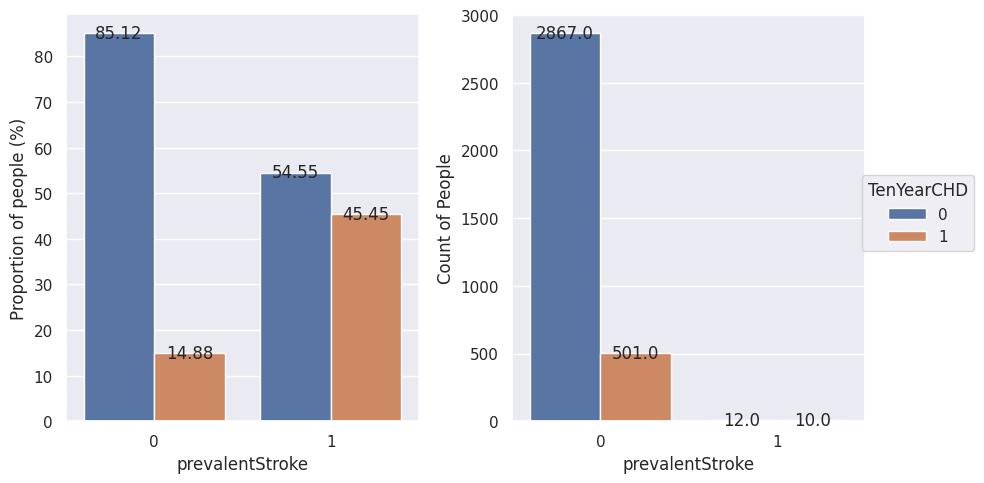

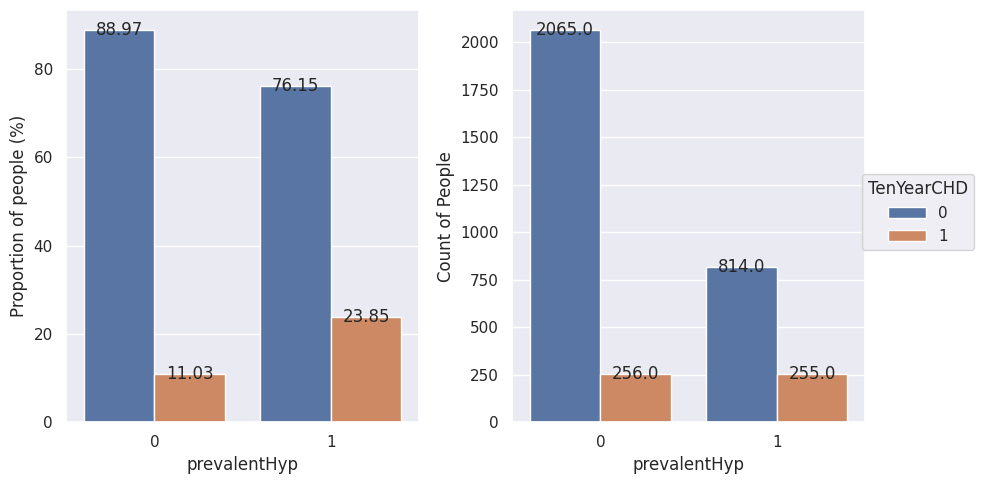

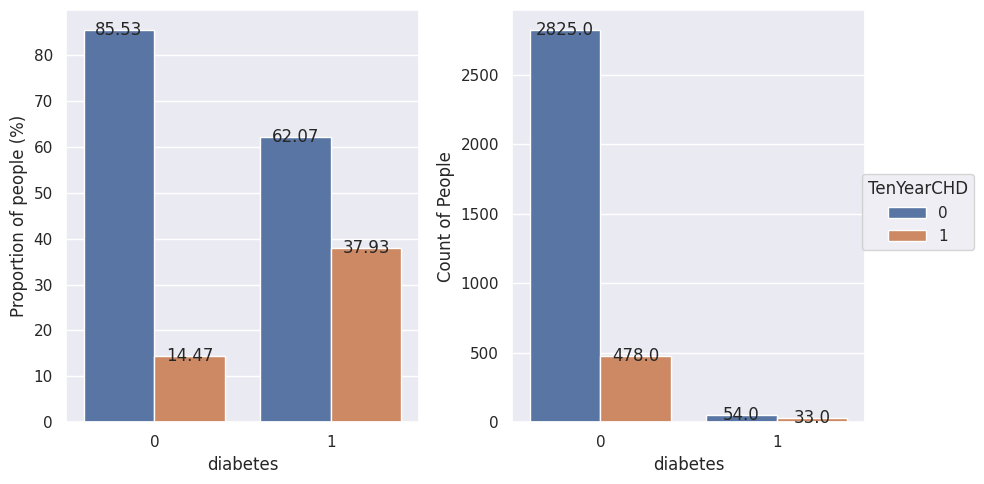

In [ ]:
for var in categ_vars:
  bivariate_discrete_plot(dataset = df, variable = var, legend = 'TenYearCHD', size = (10, 5))

**Correlation Heatmap**

In [ ]:
df.corr()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,1.000000,0.016759,-0.030573,-0.017249,0.007080,-0.038873,0.013236,0.003690,-0.019889,0.019676,0.000832,0.039849,0.024684,0.015517,0.009866
age,0.016759,1.000000,-0.172559,-0.192335,0.124376,0.059038,0.308826,0.107875,0.274028,0.404845,0.221896,0.138176,-0.002596,0.116135,0.224927
education,-0.030573,-0.172559,1.000000,0.011126,-0.019920,-0.034194,-0.084817,-0.052013,-0.020781,-0.137195,-0.060801,-0.133313,-0.046980,-0.038732,-0.052751
cigsPerDay,-0.017249,-0.192335,0.011126,1.000000,-0.037080,-0.042057,-0.079312,-0.049016,-0.024703,-0.100834,-0.068785,-0.100996,0.066759,-0.068797,0.066778
BPMeds,0.007080,0.124376,-0.019920,-0.037080,1.000000,0.119402,0.259548,0.071316,0.083299,0.263729,0.201217,0.087932,0.018107,0.064490,0.088020
prevalentStroke,-0.038873,0.059038,-0.034194,-0.042057,0.119402,1.000000,0.071652,0.010115,-0.010832,0.057568,0.047235,0.018602,-0.019184,0.023607,0.068627
prevalentHyp,0.013236,0.308826,-0.084817,-0.079312,0.259548,0.071652,1.000000,0.082565,0.159680,0.699285,0.612897,0.300464,0.150815,0.086658,0.166544
diabetes,0.003690,0.107875,-0.052013,-0.049016,0.071316,0.010115,0.082565,1.000000,0.059080,0.124011,0.061165,0.089112,0.039742,0.620211,0.103681
totChol,-0.019889,0.274028,-0.020781,-0.024703,0.083299,-0.010832,0.159680,0.059080,1.000000,0.199159,0.154974,0.114305,0.087458,0.062723,0.094306
sysBP,0.019676,0.404845,-0.137195,-0.100834,0.263729,0.057568,0.699285,0.124011,0.199159,1.000000,0.781908,0.333864,0.178262,0.143090,0.212703


<Axes: >

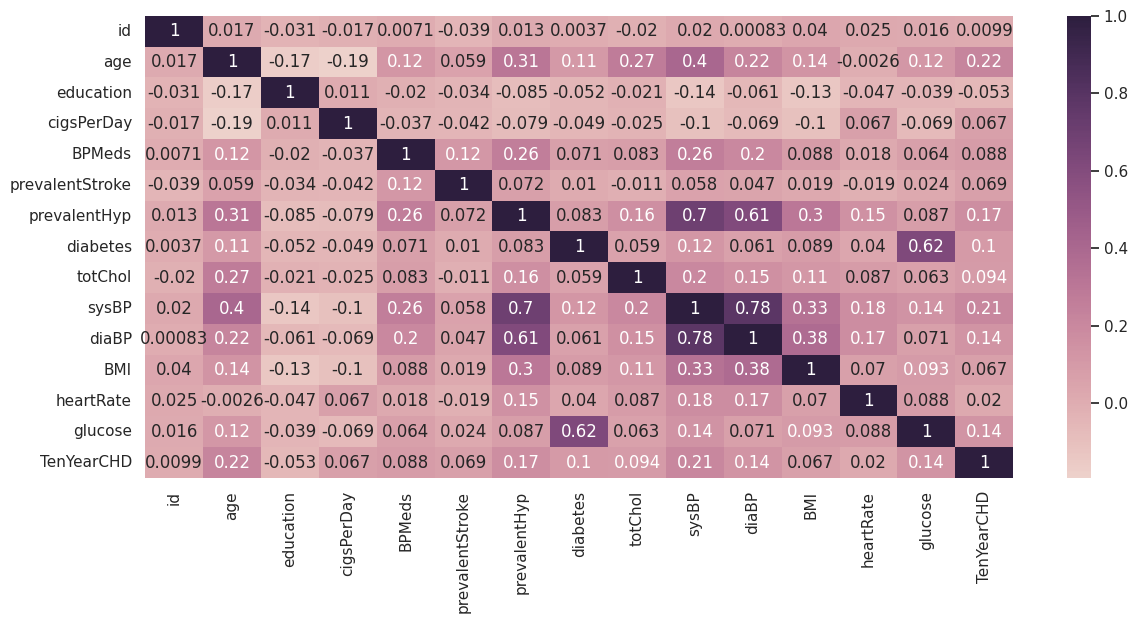

In [ ]:
plt.figure(figsize = (14, 6))
sns.heatmap(df.corr(), annot = True, cmap = sns.cubehelix_palette(as_cmap=True))

# **Feature Engineering & Data Pre-processing**

In [ ]:
data = df.copy()

**1. Handling Missing Values**

There is a total of 510 missing values in the dataset. They are distributed among the variables as follows



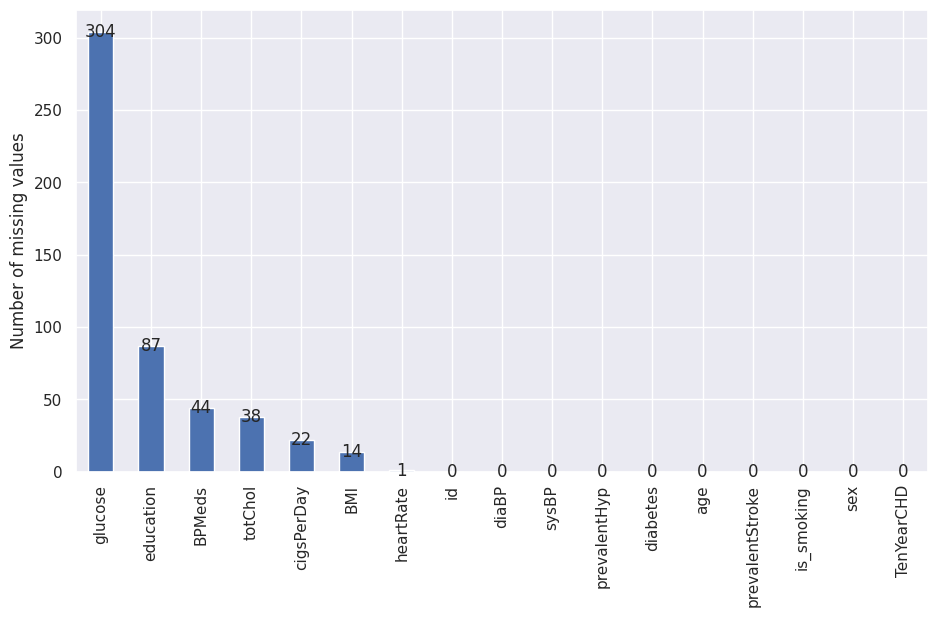

In [ ]:
print(f'There is a total of {df.isna().sum().sum()} missing values in the dataset. They are distributed among the variables as follows\n')

# Visualising the number of missing values in each variable
plt.figure(figsize = (11, 6))
ax = data.isna().sum().sort_values(ascending = False).plot(kind = 'bar')
plt.ylabel('Number of missing values')
display_vals(ax)


**1.1 Categorical variables**

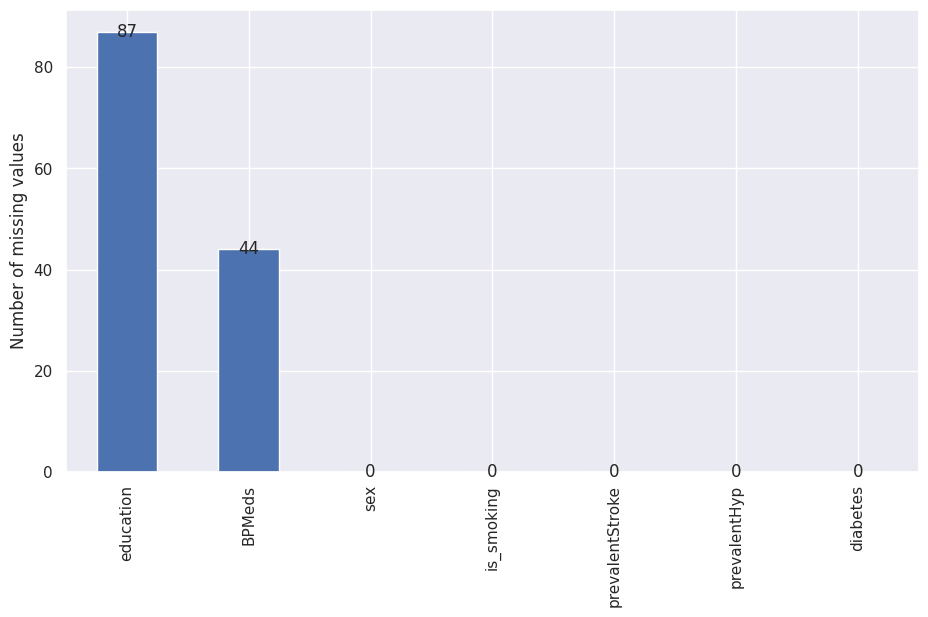

In [ ]:
plt.figure(figsize = (11, 6))
ax = data[categ_vars].isna().sum().sort_values(ascending = False).plot(kind = 'bar')
plt.ylabel('Number of missing values')
display_vals(ax)

In [ ]:
categ_vars.remove('education')

In [ ]:
bpmeds_missing = data[data['BPMeds'].isna()].index

In [ ]:
for indx in bpmeds_missing:
  # For diabetic patients
  if data.loc[indx, 'diabetes'] == 1 and (data.loc[indx, 'sysBP'] > 130 or data.loc[indx, 'diaBP'] > 80):
    data.loc[indx, 'BPMeds'] = 1

  # For non-diabetic patients
  elif data.loc[indx, 'diabetes'] == 0 and (data.loc[indx, 'sysBP'] > 140 or data.loc[indx, 'diaBP'] > 90):
    data.loc[indx, 'BPMeds'] = 1

  # For rest of the patients
  else:
    data.loc[indx, 'BPMeds'] = 0

In [ ]:
data[categ_vars].isna().sum()

sex                0
is_smoking         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
dtype: int64

**1.2 Continuous variables**

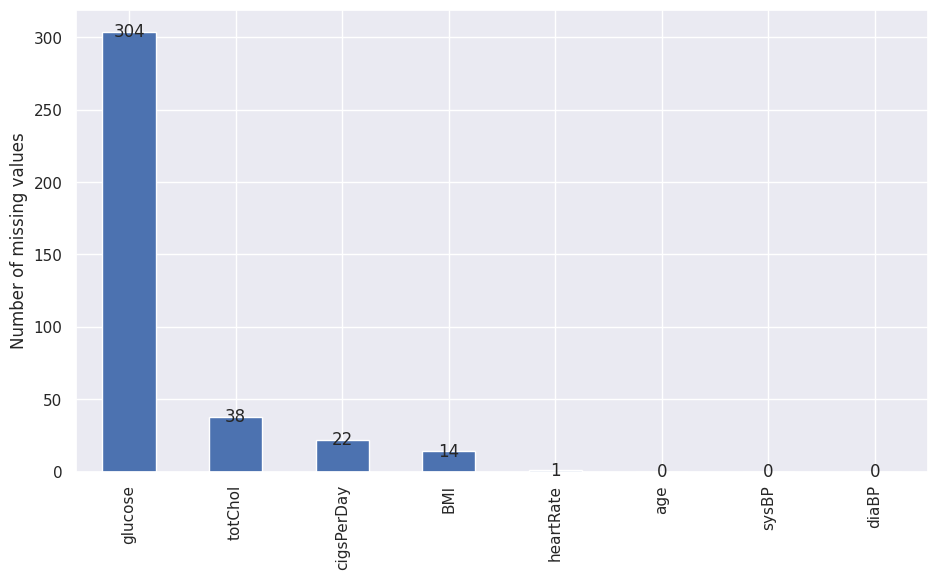

In [ ]:
plt.figure(figsize = (11, 6))
ax = data[cont_vars].isna().sum().sort_values(ascending = False).plot(kind = 'bar')
plt.ylabel('Number of missing values')
display_vals(ax)

In [ ]:
# Imputing with median of current smokers
imputing_median1 = data[data['is_smoking'] == 'YES']['cigsPerDay'].median()
data['cigsPerDay'] = data['cigsPerDay'].fillna(imputing_median1)

In [ ]:
data['cigsPerDay'].isna().sum()

0

In [ ]:
# Imputing the missing values with the median for each variable
for var in ['glucose', 'totChol', 'BMI', 'heartRate']:
  imputing_median = data[var].median()
  data[var]  = data[var].fillna(imputing_median)

In [ ]:
data.isna().sum()


id                  0
age                 0
education          87
sex                 0
is_smoking          0
cigsPerDay          0
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                 0
heartRate           0
glucose             0
TenYearCHD          0
dtype: int64

# **2. Feature Manipulation and Selection**

In [ ]:
data.corr()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,1.000000,0.016759,-0.030573,-0.016017,0.011332,-0.038873,0.013236,0.003690,-0.019792,0.019676,0.000832,0.039739,0.024691,0.014187,0.009866
age,0.016759,1.000000,-0.172559,-0.191587,0.145791,0.059038,0.308826,0.107875,0.271961,0.404845,0.221896,0.137478,-0.002636,0.112395,0.224927
education,-0.030573,-0.172559,1.000000,0.011491,-0.020384,-0.034194,-0.084817,-0.052013,-0.020579,-0.137195,-0.060801,-0.133003,-0.046948,-0.038103,-0.052751
cigsPerDay,-0.016017,-0.191587,0.011491,1.000000,-0.046812,-0.042424,-0.080009,-0.049848,-0.023534,-0.100279,-0.068486,-0.101166,0.066484,-0.064362,0.064745
BPMeds,0.011332,0.145791,-0.020384,-0.046812,1.000000,0.124313,0.270700,0.070406,0.078534,0.282539,0.214311,0.088975,0.017643,0.061137,0.089874
prevalentStroke,-0.038873,0.059038,-0.034194,-0.042424,0.124313,1.000000,0.071652,0.010115,-0.010769,0.057568,0.047235,0.017032,-0.019183,0.023662,0.068627
prevalentHyp,0.013236,0.308826,-0.084817,-0.080009,0.270700,0.071652,1.000000,0.082565,0.158693,0.699285,0.612897,0.299615,0.150731,0.082962,0.166544
diabetes,0.003690,0.107875,-0.052013,-0.049848,0.070406,0.010115,0.082565,1.000000,0.059194,0.124011,0.061165,0.087793,0.039746,0.609743,0.103681
totChol,-0.019792,0.271961,-0.020579,-0.023534,0.078534,-0.010769,0.158693,0.059194,1.000000,0.197848,0.153825,0.113452,0.086955,0.060913,0.093605
sysBP,0.019676,0.404845,-0.137195,-0.100279,0.282539,0.057568,0.699285,0.124011,0.197848,1.000000,0.781908,0.331730,0.178135,0.137832,0.212703


In [ ]:
data = data.drop(['education', 'is_smoking'], axis = 1)

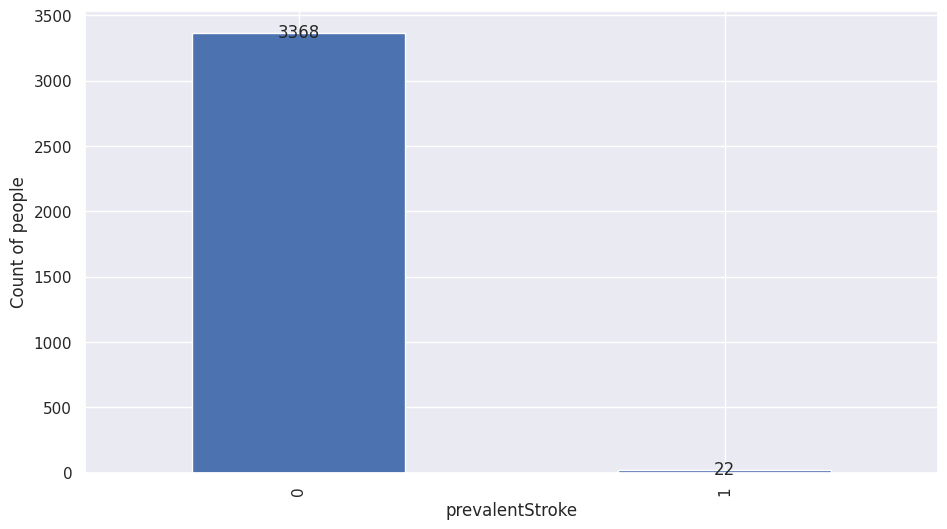

In [ ]:
var = 'prevalentStroke'
plt.figure(figsize = (11, 6))
ax = data[var].value_counts().plot(kind = 'bar')
plt.ylabel('Count of people')
plt.xlabel(var)
display_vals(ax)


In [ ]:
data.drop('prevalentStroke', axis = 1, inplace = True)

In [ ]:
data['MAP'] = (data['sysBP'] + 2*data['diaBP'])/3

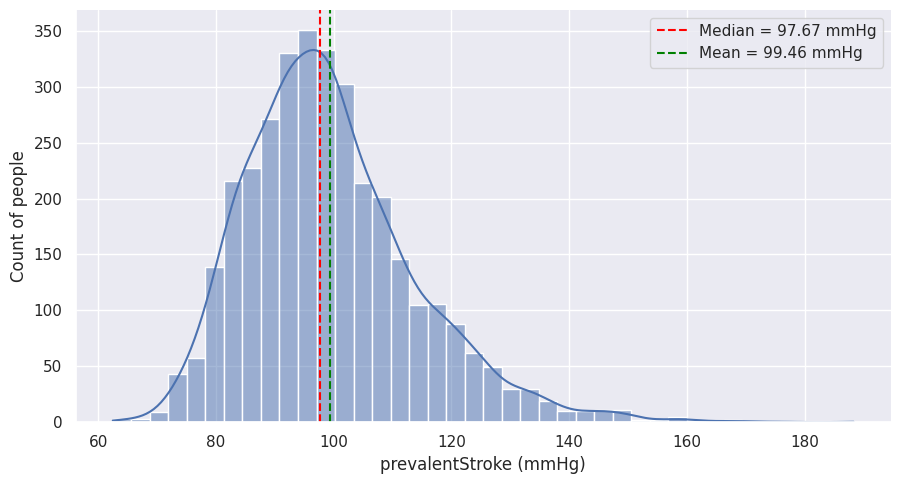

In [ ]:
displot_with_median(dataset = data, variable = 'MAP', median = True, mean = True, unit = 'mmHg')

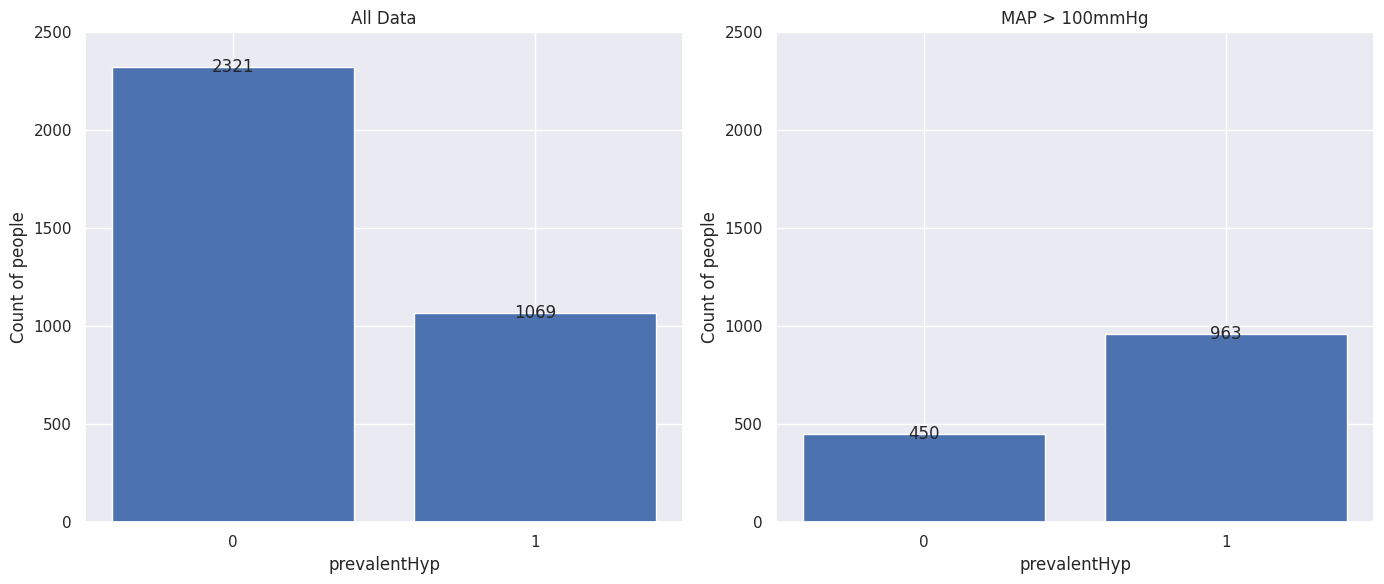

In [ ]:
# Checking distribution of prevalentHyp

filter_counts = data[data['MAP'] > 100]['prevalentHyp'].value_counts().sort_index()
all_counts = data['prevalentHyp'].value_counts().sort_index()
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 6))
ax[0].bar(all_counts.index, all_counts.values)
ax[0].set_title('All Data')
ax[1].bar(filter_counts.index, filter_counts.values)
ax[1].set_title('MAP > 100mmHg')
for i in range(2):
  ax[i].set(xticks = [0, 1], ylim = [0, 2500], ylabel = 'Count of people', xlabel = 'prevalentHyp')
  display_vals(ax[i])
plt.tight_layout()
plt.show()

In [ ]:
# Defining the function for Diabetes grades
def diabetes_grades(df):
  if df['glucose'] >= 126:
    return 4 #Diabetes
  elif df['glucose'] > 100:
    return 3 #Pre-diabetes
  elif df['glucose'] > 70:
    return 2 #Normal
  elif df['glucose'] < 71:
    return 1 #Hypoglycemia

In [ ]:
data['diabetes_grade'] = data.apply(diabetes_grades, axis = 1)

In [ ]:
# Dropping the redundant columns
data = data.drop(['sysBP', 'diaBP', 'glucose', 'diabetes', 'prevalentHyp'], axis = 1)
cont_vars = [var for var in cont_vars if var not in ['sysBP', 'diaBP', 'glucose']]
cont_vars+=['MAP']
categ_vars = [var for var in categ_vars if var not in ['is_smoking', 'diabetes', 'prevalentStroke', 'prevalentHyp']]
categ_vars+=['diabetes_grade']

print(f'The categorical variables are: {categ_vars}')
print(f'The continuous variables are: {cont_vars}')

The categorical variables are: ['sex', 'BPMeds', 'diabetes_grade']
The continuous variables are: ['age', 'cigsPerDay', 'totChol', 'BMI', 'heartRate', 'MAP']


In [ ]:
data.corr()

,id,age,cigsPerDay,BPMeds,totChol,BMI,heartRate,TenYearCHD,MAP,diabetes_grade
id,1.000000,0.016759,-0.016017,0.011332,-0.019792,0.039739,0.024691,0.009866,0.010484,0.038364
age,0.016759,1.000000,-0.191587,0.145791,0.271961,0.137478,-0.002636,0.224927,0.328295,0.103109
cigsPerDay,-0.016017,-0.191587,1.000000,-0.046812,-0.023534,-0.101166,0.066484,0.064745,-0.088752,-0.082050
BPMeds,0.011332,0.145791,-0.046812,1.000000,0.078534,0.088975,0.017643,0.089874,0.261797,0.028245
totChol,-0.019792,0.271961,-0.023534,0.078534,1.000000,0.113452,0.086955,0.093605,0.185387,0.053042
BMI,0.039739,0.137478,-0.101166,0.088975,0.113452,1.000000,0.069491,0.066134,0.377776,0.068295
heartRate,0.024691,-0.002636,0.066484,0.017643,0.086955,0.069491,1.000000,0.020167,0.186931,0.099841
TenYearCHD,0.009866,0.224927,0.064745,0.089874,0.093605,0.066134,0.020167,1.000000,0.183146,0.088146
MAP,0.010484,0.328295,-0.088752,0.261797,0.185387,0.377776,0.186931,0.183146,1.000000,0.093841
diabetes_grade,0.038364,0.103109,-0.082050,0.028245,0.053042,0.068295,0.099841,0.088146,0.093841,1.000000


# **3. Handling Outliers**

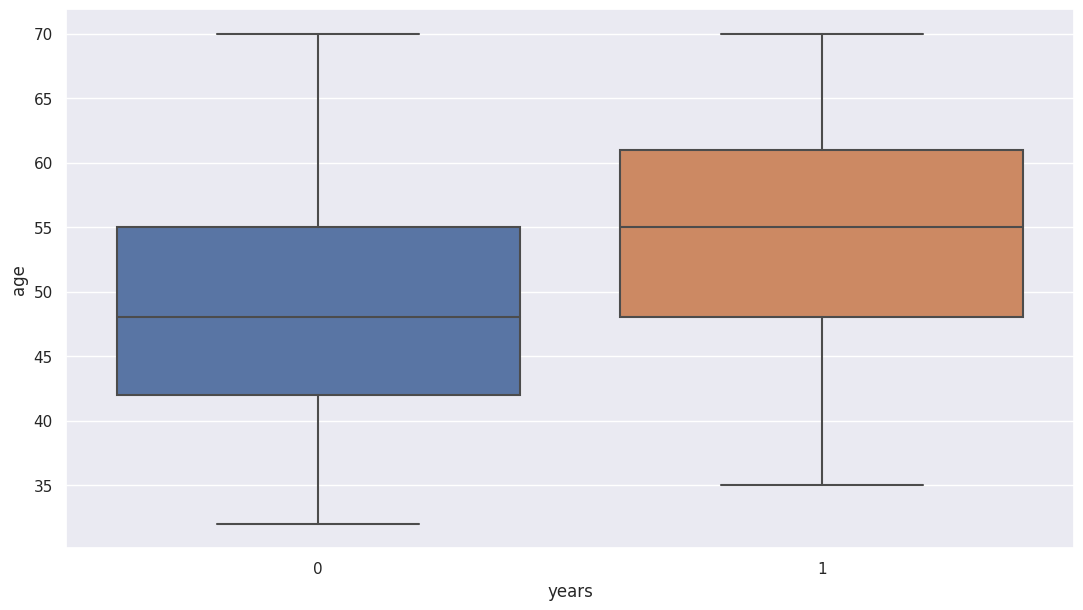

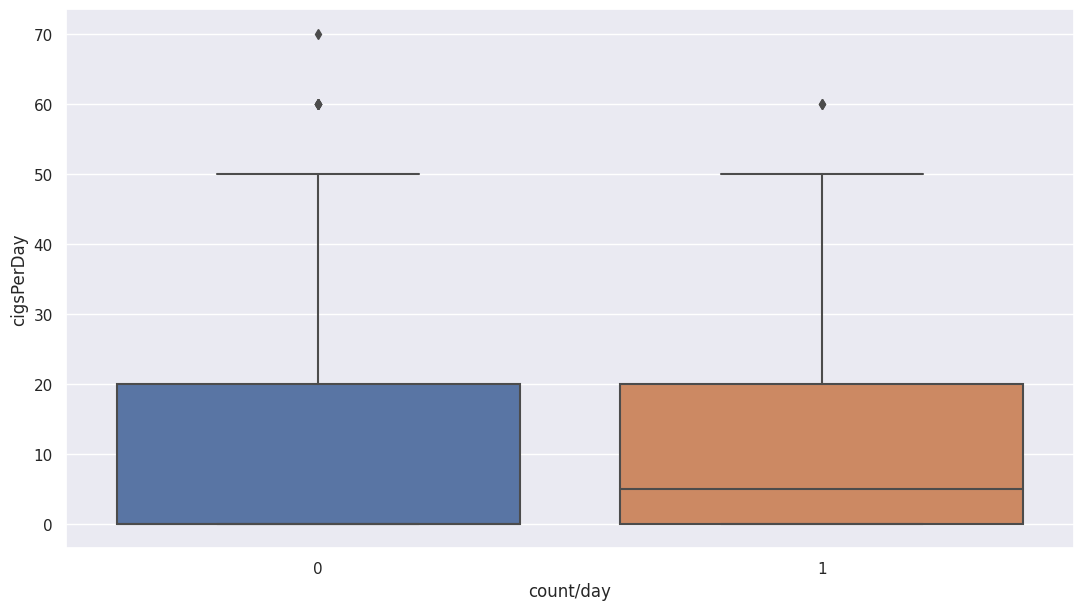

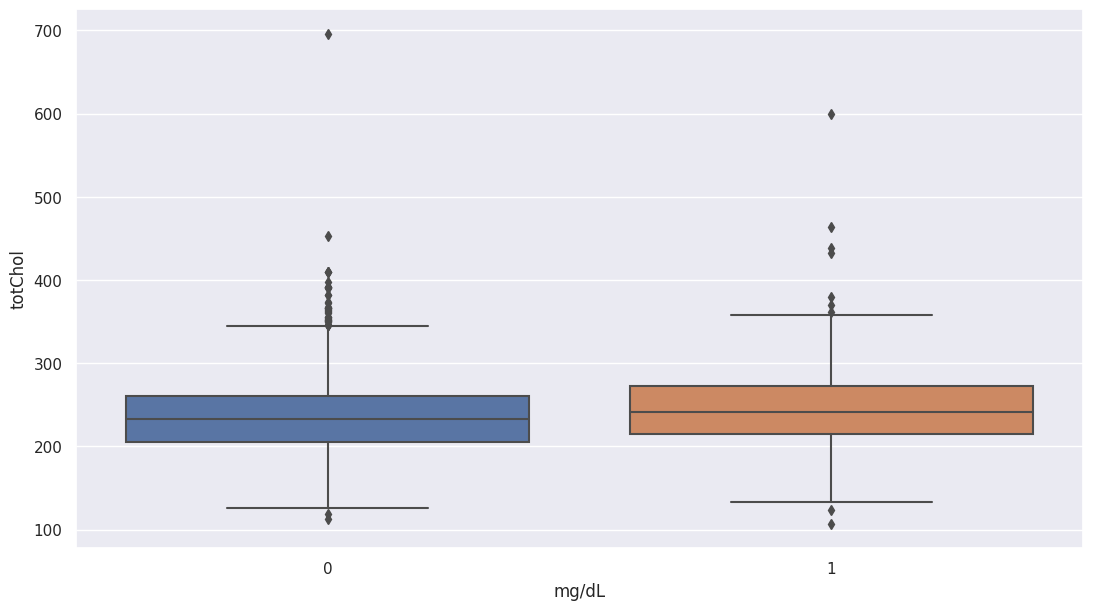

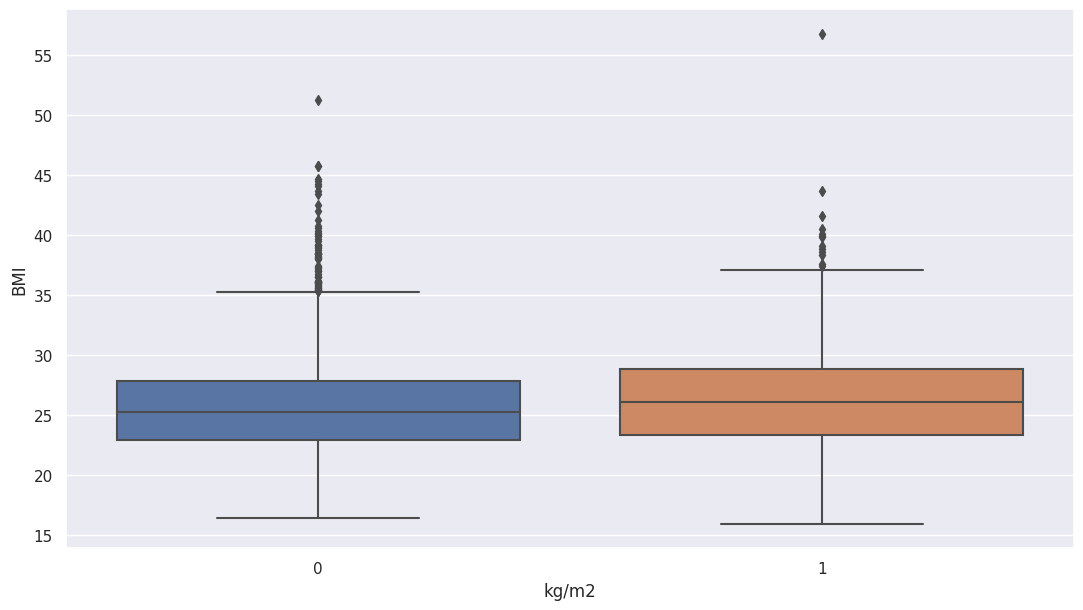

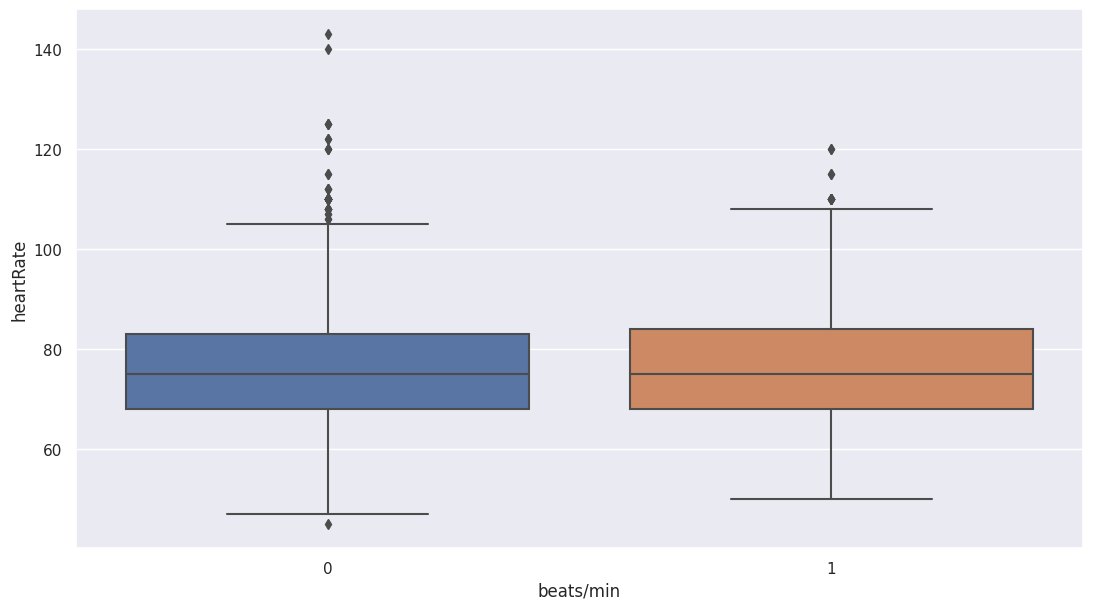

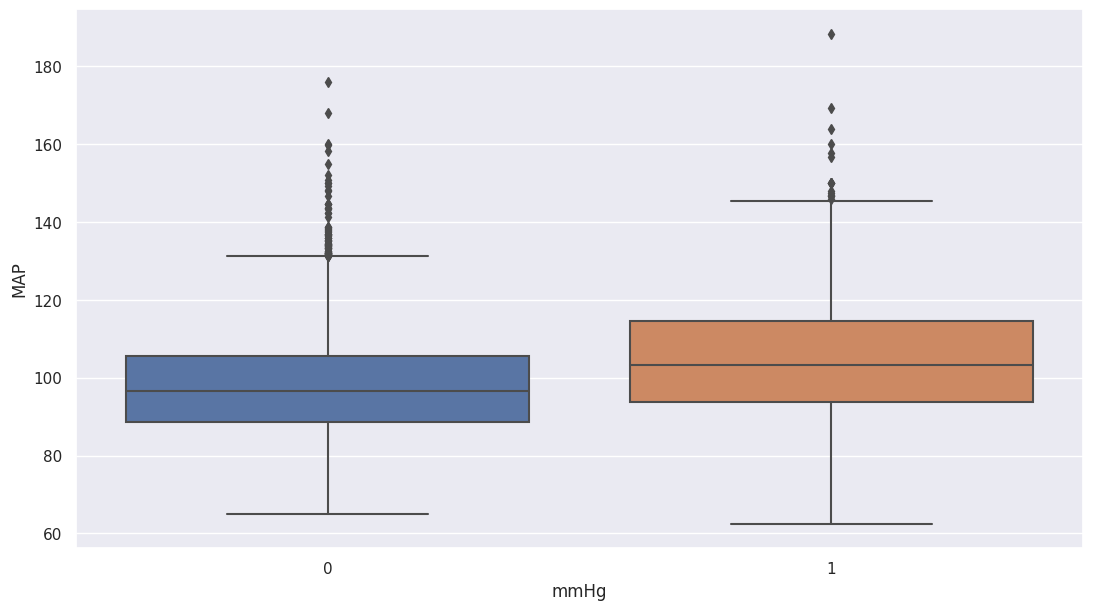

In [ ]:
# Visualising the outliers
cont_var_units['MAP'] = 'mmHg'
for var in cont_vars:
  plt.figure(figsize = (13,7))
  sns.boxplot(data = data, y = var, x = 'TenYearCHD')
  plt.ylabel(var)
  plt.xlabel(cont_var_units[var])
  plt.show()


In [ ]:
# Limitting maximum values
max_limits = [50, 500, 45, 120, 165]
outlier_vars = cont_vars[1:]
for var, limit in zip(outlier_vars, max_limits):
  data.loc[data[var] > limit, var] = limit

# Limitting the minimum value of heartRate
data.loc[data['heartRate'] < 50, 'heartRate'] = 50

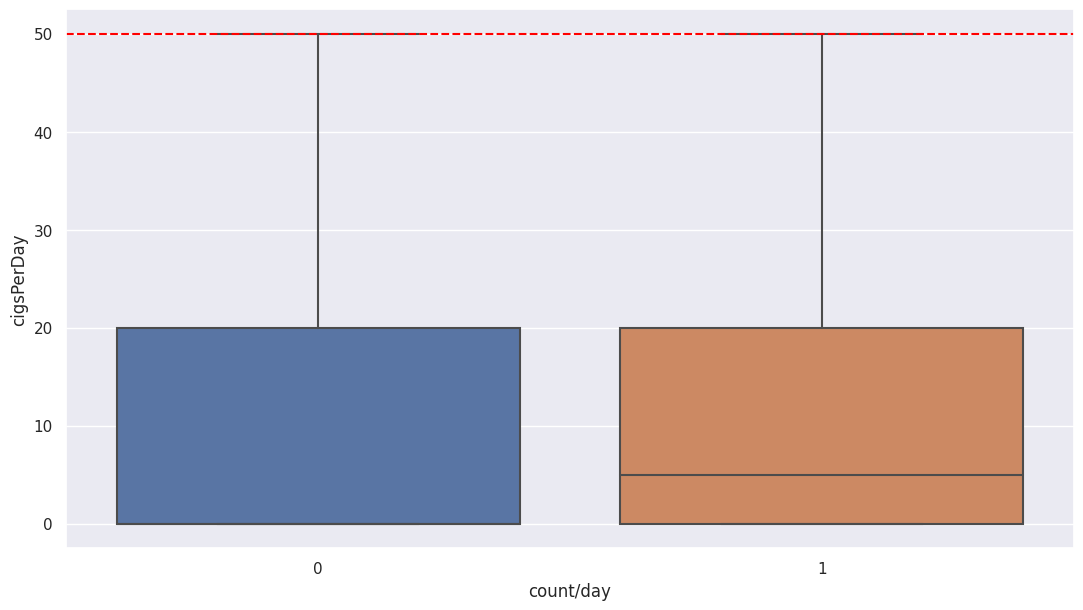

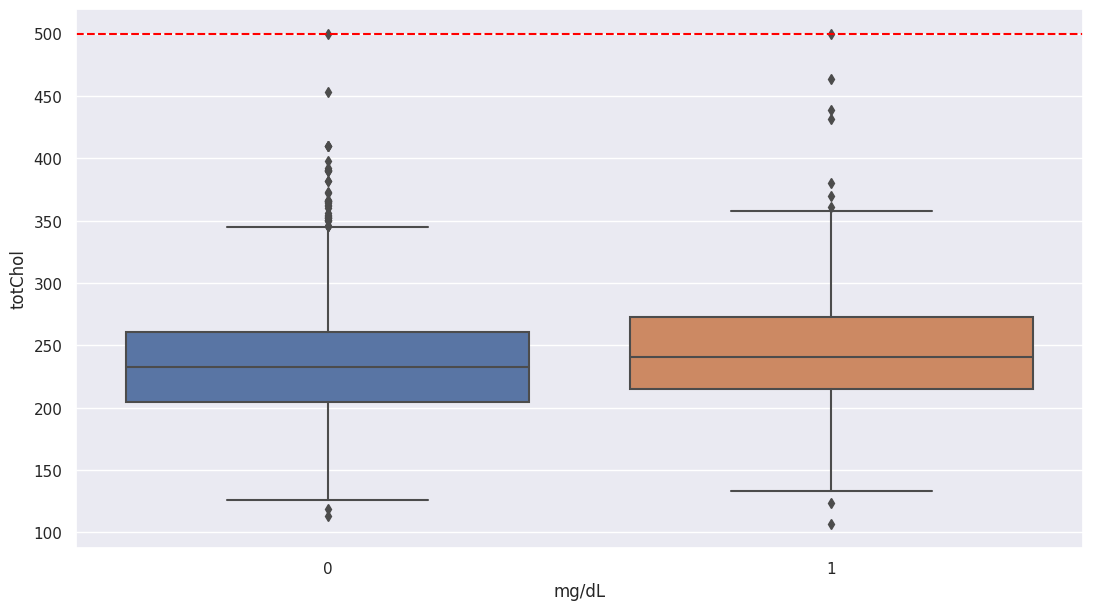

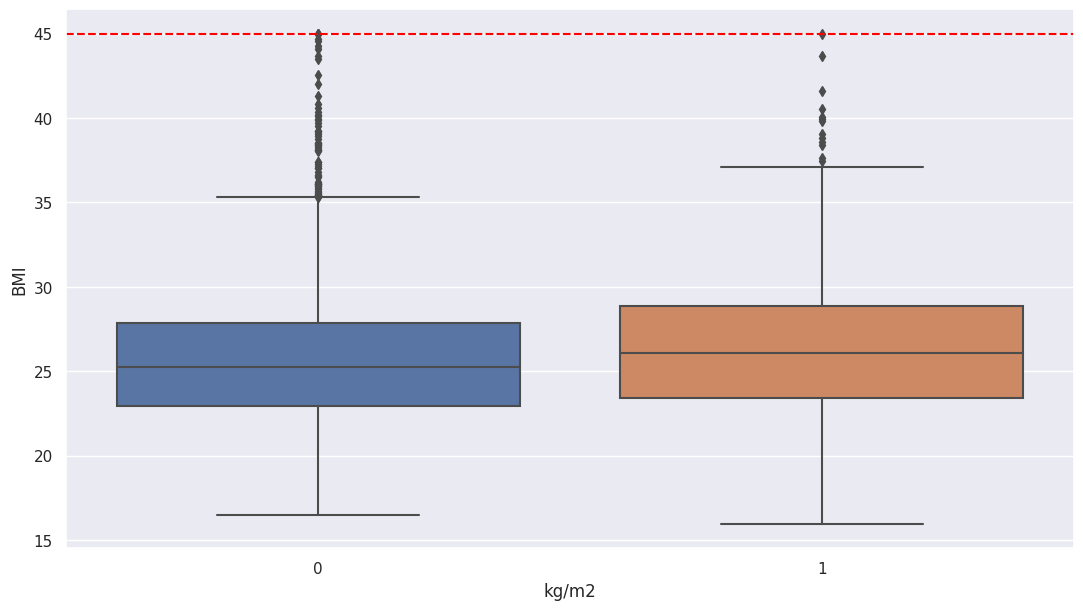

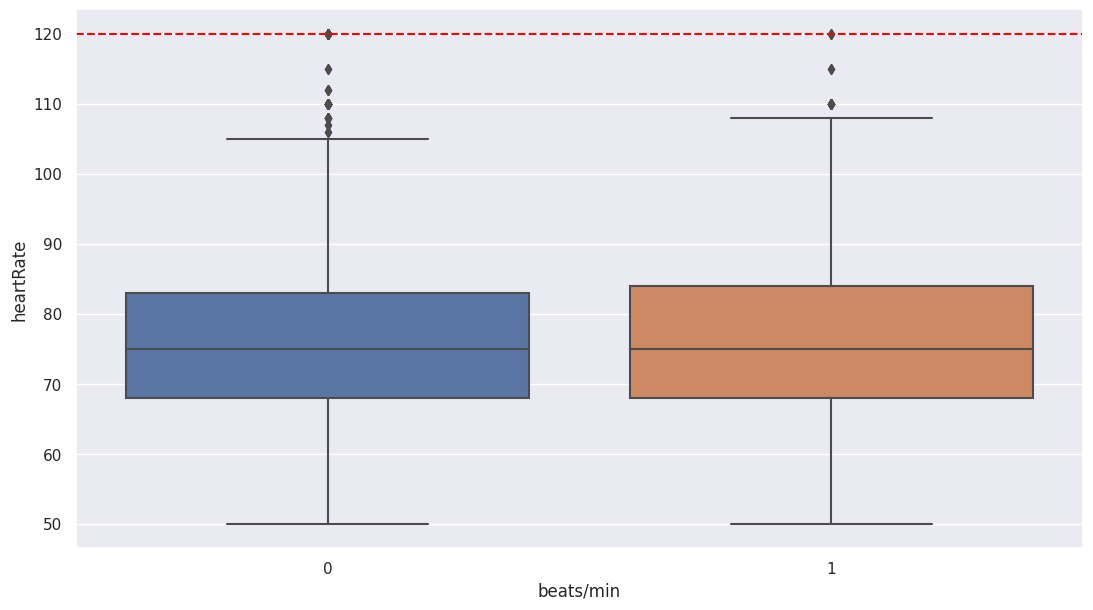

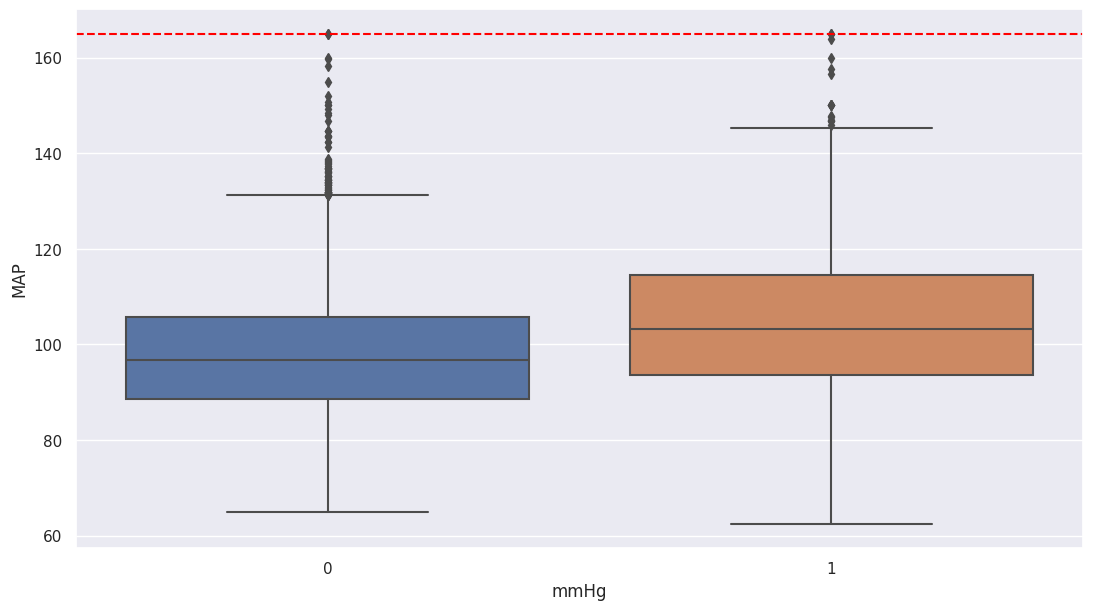

In [ ]:
# Visualising the outliers with the maximum limit after Winsorising
for var, limit in zip(outlier_vars, max_limits):
  plt.figure(figsize = (13,7))
  sns.boxplot(data = data, y = var, x = 'TenYearCHD')
  plt.axhline(limit, color = 'red', linestyle = '--')
  plt.ylabel(var)
  plt.xlabel(cont_var_units[var])
  plt.show()

# **4. Categorical Encoding**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3390 non-null   int64  
 1   age             3390 non-null   int64  
 2   sex             3390 non-null   object 
 3   cigsPerDay      3390 non-null   float64
 4   BPMeds          3390 non-null   float64
 5   totChol         3390 non-null   float64
 6   BMI             3390 non-null   float64
 7   heartRate       3390 non-null   float64
 8   TenYearCHD      3390 non-null   int64  
 9   MAP             3390 non-null   float64
 10  diabetes_grade  3390 non-null   int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 291.5+ KB


In [ ]:
data['sex'].value_counts()

F    1923
M    1467
Name: sex, dtype: int64

In [ ]:
data['sex'] = data['sex'].map({'M':1, 'F':0})

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3390 non-null   int64  
 1   age             3390 non-null   int64  
 2   sex             3390 non-null   int64  
 3   cigsPerDay      3390 non-null   float64
 4   BPMeds          3390 non-null   float64
 5   totChol         3390 non-null   float64
 6   BMI             3390 non-null   float64
 7   heartRate       3390 non-null   float64
 8   TenYearCHD      3390 non-null   int64  
 9   MAP             3390 non-null   float64
 10  diabetes_grade  3390 non-null   int64  
dtypes: float64(6), int64(5)
memory usage: 291.5 KB


# **5. Data Splitting**

In [ ]:
X = data.drop(['TenYearCHD', 'id'], axis = 1)
Y = data['TenYearCHD']

# Visualising the input data
X.head()


,age,sex,cigsPerDay,BPMeds,totChol,BMI,heartRate,MAP,diabetes_grade
0,64,0,3.0,0.0,221.0,25.38,90.0,106.000000,2
1,36,1,0.0,0.0,212.0,29.77,72.0,121.333333,2
2,46,0,10.0,0.0,250.0,20.35,88.0,86.000000,2
3,50,1,20.0,0.0,233.0,28.26,68.0,111.333333,2
4,64,0,30.0,0.0,241.0,26.42,70.0,102.166667,2


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 8, stratify = Y, shuffle = True)

In [ ]:
Y_train.value_counts()

0    2303
1     409
Name: TenYearCHD, dtype: int64

In [ ]:
Y_test.value_counts()

0    576
1    102
Name: TenYearCHD, dtype: int64

# **6. Handling Imbalanced Dataset**

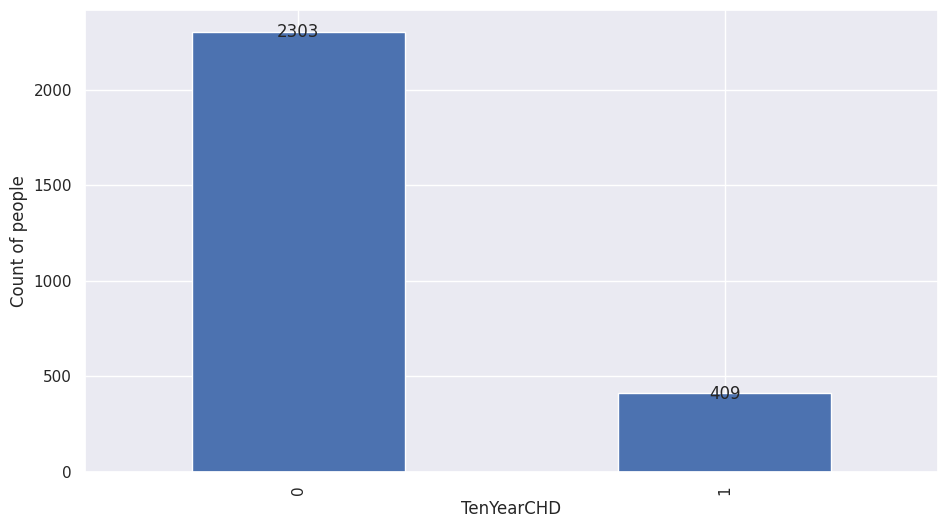

In [ ]:
plt.figure(figsize = (11, 6))
ax = Y_train.value_counts().plot(kind = 'bar')
plt.ylabel('Count of people')
plt.xlabel('TenYearCHD')
display_vals(ax)

**SMOTE for Handling Imbalanced data**

In [ ]:
smote = SMOTE(random_state = 8)
X_smote, Y_train_final = smote.fit_resample(X_train, Y_train)

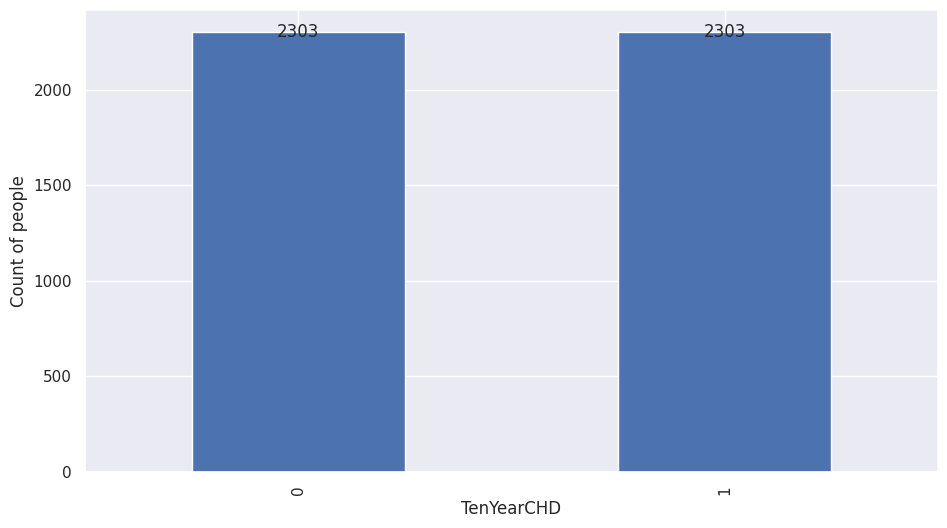

In [ ]:
# Visualising the class balance after using SMOTE
plt.figure(figsize = (11, 6))
ax = Y_train_final.value_counts().plot(kind = 'bar')
plt.ylabel('Count of people')
plt.xlabel('TenYearCHD')
display_vals(ax)

# **7. Data Scaling**

In [ ]:
scaler = MinMaxScaler()
X_train_final = scaler.fit_transform(X_smote)
X_test_final = scaler.transform(X_test)


# **8.ML Model Implementation**

In [ ]:
# Function to plot the Confusion Matrix
def confusion_plot(cm):

  cmd = ConfusionMatrixDisplay(cm, display_labels = ['No risk (0)', 'Risk (1)'])
  cmd.plot(cmap = 'Blues')
  plt.title('Confusion Matrix for Test Data')
  plt.show()

# Function to train and test a given classification model
def model_train_test(model, train_x, train_y, test_x, test_y, gs = False, confusion = True):


  model.fit(train_x, train_y)
  if gs == True:
    print(f'Best model parameters are: {model.best_params_}')
    print(f'Best model score is: {model.best_score_}\n')
    model = model.best_estimator_

  # Getting the train and test predictions
  train_preds = model.predict(train_x)
  train_recall = recall_score(y_true = train_y, y_pred = train_preds, average='binary')
  train_roc = roc_auc_score(train_y, train_preds)
  test_preds = model.predict(test_x)
  test_recall = recall_score(y_true = test_y, y_pred = test_preds, average='binary')
  test_roc = roc_auc_score(test_y, test_preds)

  # Plotting confusion matrix
  if confusion == True:
    confusion_plot(confusion_matrix(test_y, test_preds))

  output_metrics = {'Train Recall':train_recall, 'Test Recall':test_recall, 'Train ROC-AUC':train_roc, 'Test ROC-AUC':test_roc}
  return output_metrics, test_preds, model


In [ ]:
scores = dict()
scores['Train Recall'] = []
scores['Test Recall'] = []
scores['Train ROC-AUC'] = []
scores['Test ROC-AUC'] = []
model_names = ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'KNN', 'SVM', 'Random Forest', 'XGBoost']

**ML Model - 1 - Logistic Regression**

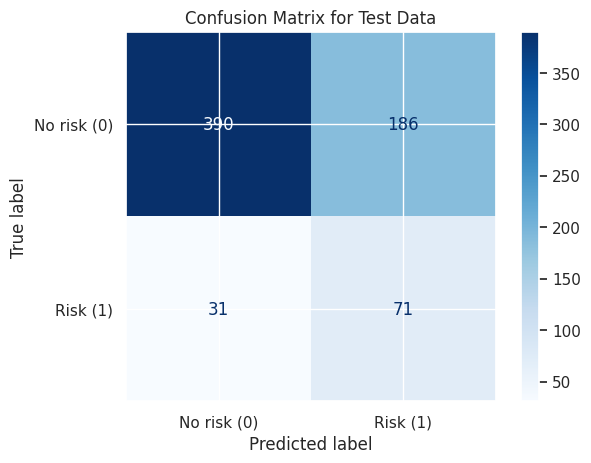

In [ ]:
lr_scores, lr_test_preds, lr_model = model_train_test(LogisticRegression(), X_train_final, Y_train_final, X_test_final, Y_test)

In [ ]:
# Classification Report
print(classification_report(Y_test, lr_test_preds, target_names=['class-0', 'class-1']))

              precision    recall  f1-score   support

     class-0       0.93      0.68      0.78       576
     class-1       0.28      0.70      0.40       102

    accuracy                           0.68       678
   macro avg       0.60      0.69      0.59       678
weighted avg       0.83      0.68      0.72       678



In [ ]:
# Printing the train and test Recalls and ROC-AUC scores
def print_scores(model_name, model_scores):
  '''Function to print the scores of a given model'''
  print(f"The train and test recalls of the {model_name} Model are: {round(model_scores['Train Recall'] * 100, 2)}% and {round(model_scores['Test Recall'] * 100, 2)}% respectively")
  print(f"The train and test ROC-AUC scores of the {model_name} Model are: {round(model_scores['Train ROC-AUC'] * 100, 2)}% and {round(model_scores['Test ROC-AUC'] * 100, 2)}% respectively")

print_scores(model_name = model_names[0], model_scores = lr_scores)


The train and test recalls of the Logistic Regression Model are: 67.0% and 69.61% respectively
The train and test ROC-AUC scores of the Logistic Regression Model are: 65.85% and 68.66% respectively


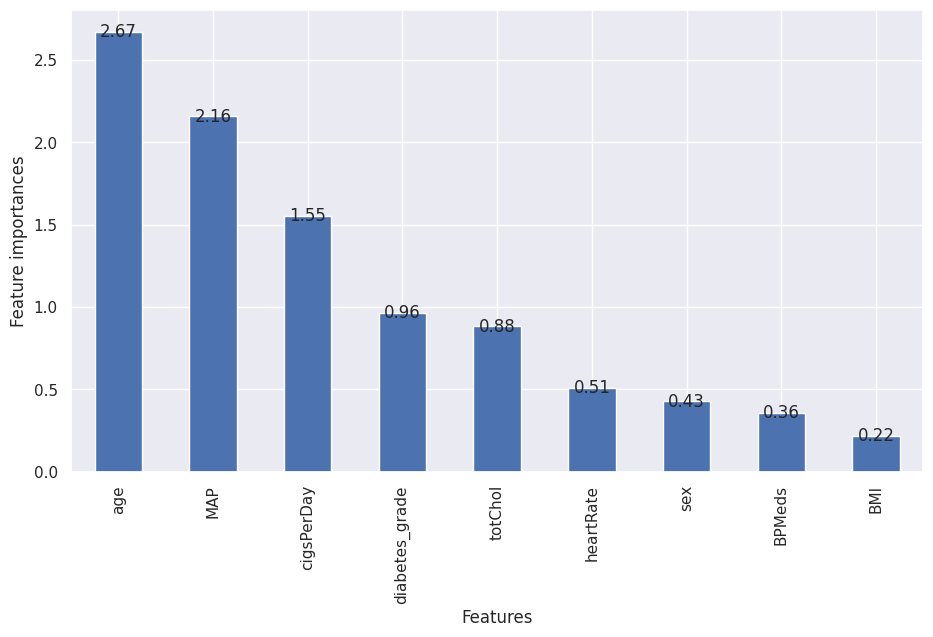

In [ ]:
# Displaying feature importances
lr_importances = pd.Series(abs(lr_model.coef_[0]), index = X.columns)
plt.figure(figsize = (11, 6))
ax = lr_importances.sort_values(ascending = False).plot(kind = 'bar')
ax.set(xlabel = 'Features', ylabel = 'Feature importances')
display_vals(ax)


In [ ]:
for score in lr_scores:
  scores[score].append(lr_scores[score] * 100)

**ML Model - 2 - Naive Bayes**

In [ ]:
# Defining the Hyperparameters and scoring metric
params_nb = {'var_smoothing': np.logspace(0, -9, num = 50)}
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 3, random_state = 42)
scorer = make_scorer(recall_score, average = 'binary')

nb_models = GridSearchCV(GaussianNB(), params_nb, cv = cv, scoring = scorer)

Best model parameters are: {'var_smoothing': 0.1842069969326716}
Best model score is: 0.5102144047282217



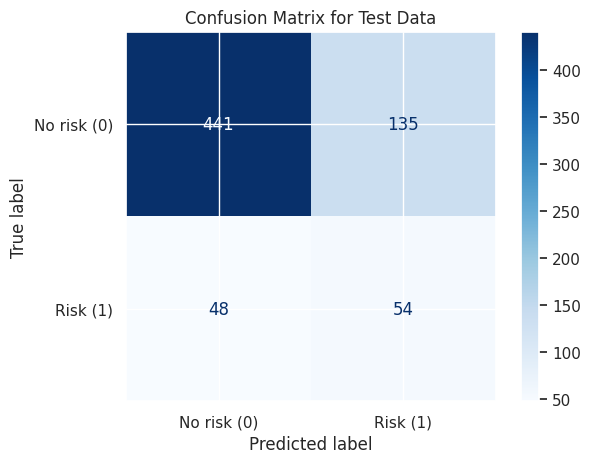

In [ ]:
# Training the model
nb_scores, nb_test_preds, nb_model = model_train_test(nb_models, X_train_final, Y_train_final, X_test_final, Y_test, gs = True)

In [ ]:
# Classification Report
print(classification_report(Y_test, nb_test_preds, target_names=['class-0', 'class-1']))

              precision    recall  f1-score   support

     class-0       0.90      0.77      0.83       576
     class-1       0.29      0.53      0.37       102

    accuracy                           0.73       678
   macro avg       0.59      0.65      0.60       678
weighted avg       0.81      0.73      0.76       678



In [ ]:
print_scores(model_name = model_names[1], model_scores = nb_scores)

The train and test recalls of the Naive Bayes Model are: 51.58% and 52.94% respectively
The train and test ROC-AUC scores of the Naive Bayes Model are: 63.48% and 64.75% respectively


In [ ]:
for score in nb_scores:
  scores[score].append(nb_scores[score] * 100)

**ML Model - 3 - Decision Tree**

In [ ]:
# Defining the Hyperparameters
params_dt = {
              'max_depth' : [3, 4, 5],
              'min_samples_split':[10, 20, 25, 30],
              'min_samples_leaf':[10, 20, 25, 30]
              }

dt_model = DecisionTreeClassifier(criterion= 'entropy', random_state = 42)
dt_models = GridSearchCV(dt_model, params_dt, cv = cv, scoring = scorer)

Best model parameters are: {'max_depth': 4, 'min_samples_leaf': 30, 'min_samples_split': 10}
Best model score is: 0.8323807727372757



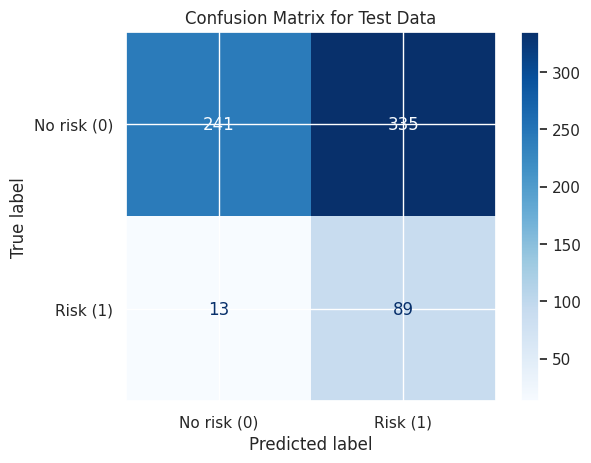

In [ ]:
dt_scores, dt_test_preds, dt_model = model_train_test(dt_models, X_train_final, Y_train_final, X_test_final, Y_test, gs =True)

In [ ]:
# Classification Report
print(classification_report(Y_test, dt_test_preds, target_names=['class-0', 'class-1']))

              precision    recall  f1-score   support

     class-0       0.95      0.42      0.58       576
     class-1       0.21      0.87      0.34       102

    accuracy                           0.49       678
   macro avg       0.58      0.65      0.46       678
weighted avg       0.84      0.49      0.54       678



In [ ]:
# Printing the model scores
print_scores(model_name = model_names[2], model_scores = dt_scores)

The train and test recalls of the Decision Tree Model are: 90.19% and 87.25% respectively
The train and test ROC-AUC scores of the Decision Tree Model are: 66.22% and 64.55% respectively


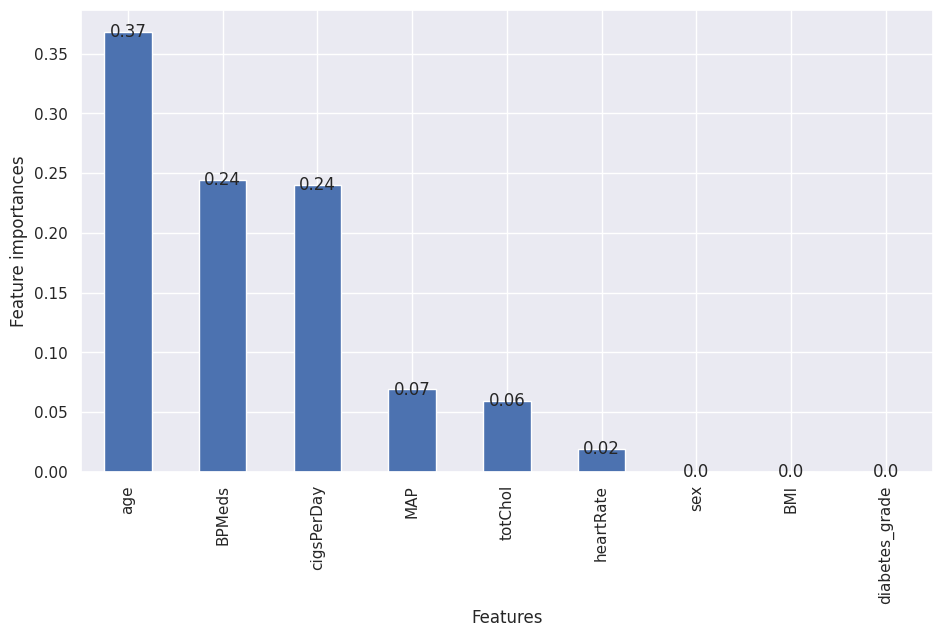

In [ ]:
# Displaying the Feature importances
dt_importances = pd.Series(dt_model.feature_importances_, index = X.columns)
plt.figure(figsize = (11, 6))
ax = dt_importances.sort_values(ascending = False).plot(kind = 'bar')
ax.set(xlabel = 'Features', ylabel = 'Feature importances')
display_vals(ax)

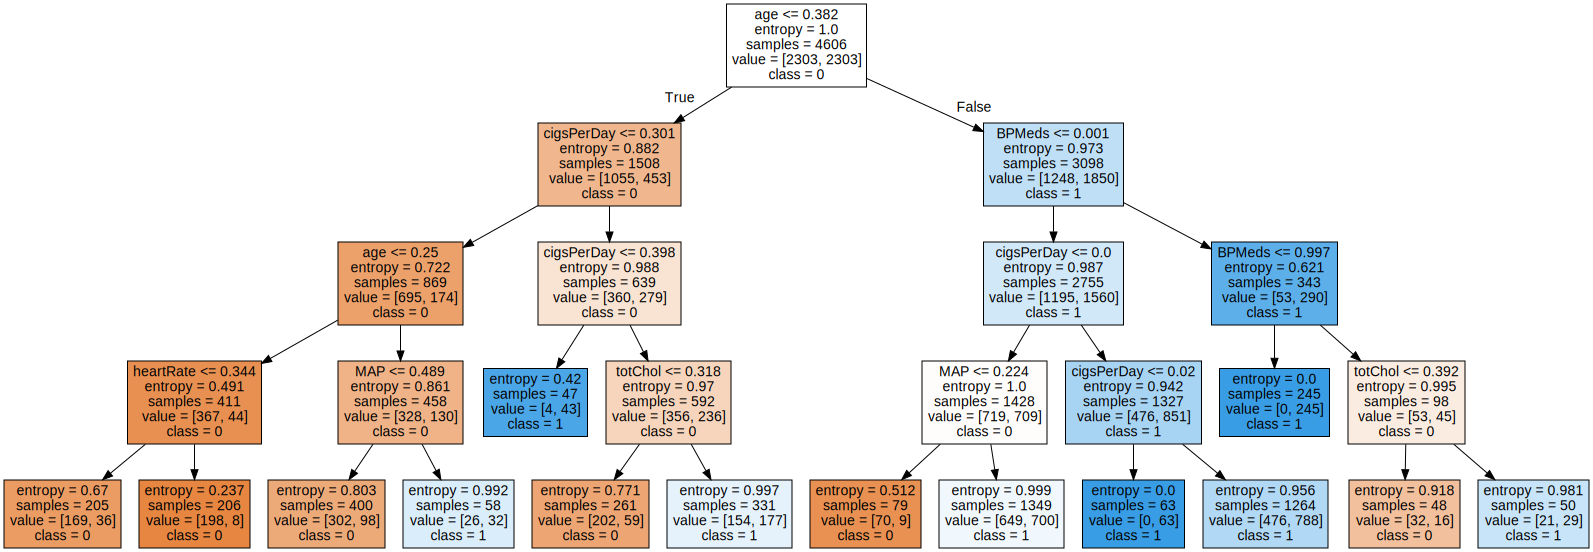

In [ ]:
# Visualising the decision tree
graph = Source(tree.export_graphviz(dt_model, out_file = None, feature_names = X.columns, class_names=['0', '1'] , filled = True))
display(SVG(graph.pipe(format = 'svg')))

In [ ]:
for score in dt_scores:
  scores[score].append(dt_scores[score] * 100)

**ML Model - 4 - K-Nearest Neighbours**

In [ ]:
# Fitting the knn model for various values of k

knn_train_recalls = []
knn_test_recalls = []
for k in range(1, 51):
  knn_scores = model_train_test(KNeighborsClassifier(n_neighbors = k), X_train_final, Y_train_final, X_test_final, Y_test, confusion = False)[0]
  knn_train_recalls.append(knn_scores['Train Recall'])
  knn_test_recalls.append(knn_scores['Test Recall'])

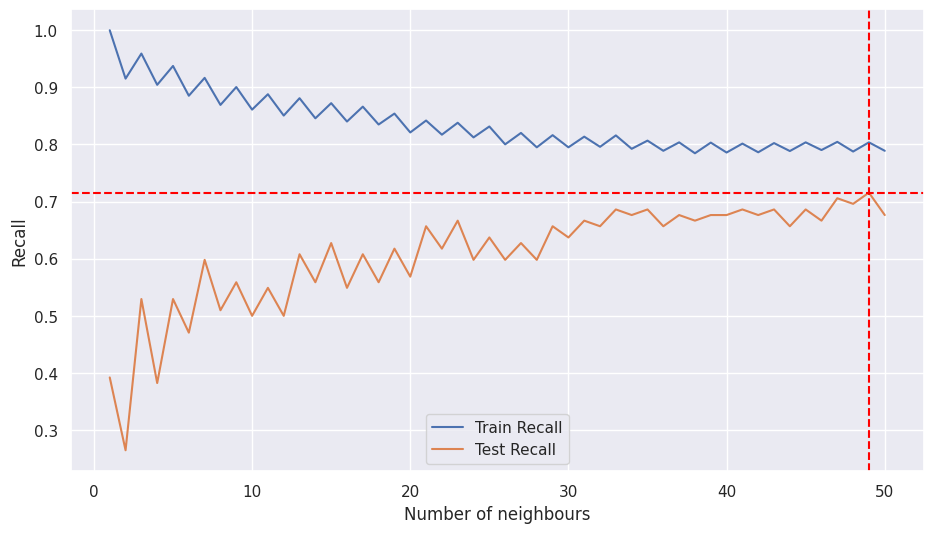

Optimum value of n_neighbours with highest value of test recall is 49


In [ ]:
# Plotting the train and test recalls
k_optimum = knn_test_recalls.index(max(knn_test_recalls)) + 1
plt.figure(figsize=(11, 6))
plt.plot(range(1, 51), knn_train_recalls, label='Train Recall')
plt.plot(range(1, 51), knn_test_recalls, label='Test Recall')
plt.axhline(max(knn_test_recalls), color = 'red', linestyle = '--')
plt.axvline(k_optimum, color = 'red', linestyle = '--')
plt.xlabel('Number of neighbours')
plt.ylabel('Recall')
plt.legend()
plt.show()

print(f'Optimum value of n_neighbours with highest value of test recall is {k_optimum}')

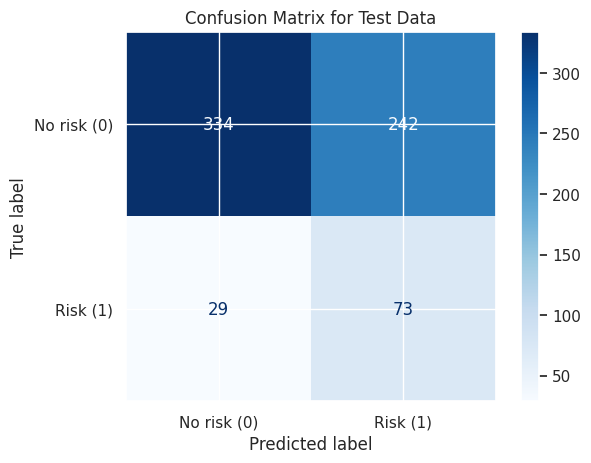

In [ ]:
# Fitting the knn model with the optimum k
knn_scores, knn_test_preds, knn_model = model_train_test(KNeighborsClassifier(n_neighbors = k_optimum), X_train_final, Y_train_final, X_test_final, Y_test, gs = False)

In [ ]:
print(classification_report(Y_test, knn_test_preds, target_names=['class-0', 'class-1']))

              precision    recall  f1-score   support

     class-0       0.92      0.58      0.71       576
     class-1       0.23      0.72      0.35       102

    accuracy                           0.60       678
   macro avg       0.58      0.65      0.53       678
weighted avg       0.82      0.60      0.66       678



In [ ]:
print_scores(model_name = model_names[3], model_scores = knn_scores)

The train and test recalls of the KNN Model are: 80.37% and 71.57% respectively
The train and test ROC-AUC scores of the KNN Model are: 70.32% and 64.78% respectively


In [ ]:
for score in knn_scores:
  scores[score].append(knn_scores[score] * 100)

**ML Model - 5 - Support Vector Machine**

In [ ]:
# Defining the Hyperparameters
params_svc = {
              'C':[0.1, 1, 10],
              'gamma':[0.01, 0.001, 0.0001],
              'kernel':['rbf', 'poly', 'sigmoid']
              }

svc_models = GridSearchCV(SVC(), params_svc, cv = cv, scoring = scorer)

Best model parameters are: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best model score is: 0.701117922600522



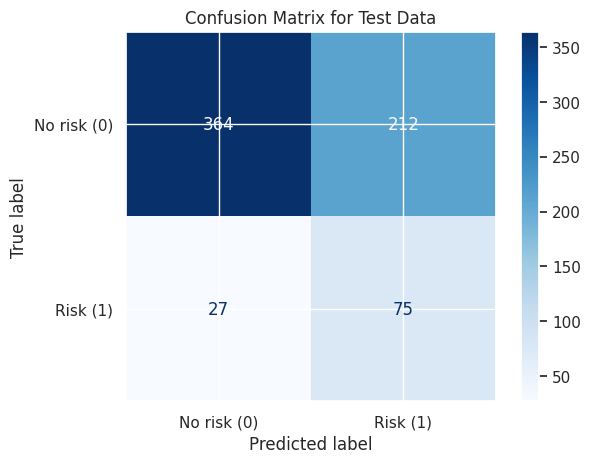

In [ ]:
svc_scores, svc_test_preds, svc_model = model_train_test(svc_models, X_train_final, Y_train_final, X_test_final, Y_test, gs = True)

In [ ]:
# Classification Report
print(classification_report(Y_test, svc_test_preds, target_names=['class-0', 'class-1']))

              precision    recall  f1-score   support

     class-0       0.93      0.63      0.75       576
     class-1       0.26      0.74      0.39       102

    accuracy                           0.65       678
   macro avg       0.60      0.68      0.57       678
weighted avg       0.83      0.65      0.70       678



In [ ]:
# Printing the scores
print_scores(model_name = model_names[4], model_scores = svc_scores)

The train and test recalls of the SVM Model are: 70.78% and 73.53% respectively
The train and test ROC-AUC scores of the SVM Model are: 65.85% and 68.36% respectively


In [ ]:
for score in svc_scores:
  scores[score].append(svc_scores[score] * 100)

**ML Model - 6 - Random Forest**

In [ ]:
# Defining the Hyperparameters
params_rf = {
              'n_estimators':[50, 100, 200],
              'max_depth':[3, 4, 5],
              'min_samples_split':[10, 20, 25],
              'min_samples_leaf':[10, 20, 25]
              }

rf_model = RandomForestClassifier(criterion= 'entropy', random_state = 42)
rf_models = GridSearchCV(rf_model, params_rf, cv = cv, scoring = scorer)

Best model parameters are: {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 25, 'n_estimators': 100}
Best model score is: 0.7827583388349209



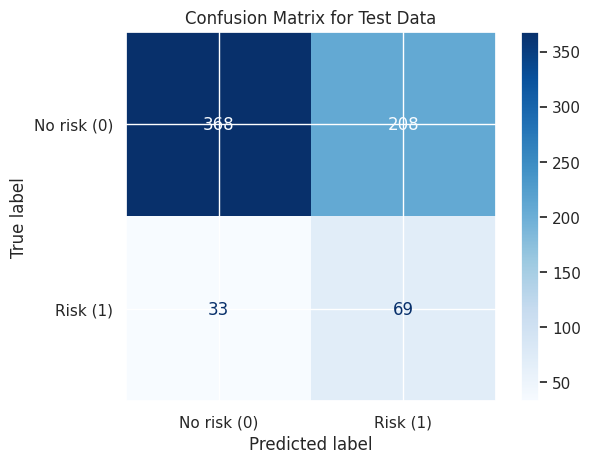

In [ ]:
# Training the model

rf_scores, rf_test_preds, rf_model = model_train_test(rf_models, X_train_final, Y_train_final, X_test_final, Y_test, gs = True)

In [ ]:
print(classification_report(Y_test, rf_test_preds, target_names=['class-0', 'class-1']))

              precision    recall  f1-score   support

     class-0       0.92      0.64      0.75       576
     class-1       0.25      0.68      0.36       102

    accuracy                           0.64       678
   macro avg       0.58      0.66      0.56       678
weighted avg       0.82      0.64      0.69       678



In [ ]:
# Printing the model scores
print_scores(model_name = model_names[5], model_scores = rf_scores)

The train and test recalls of the Random Forest Model are: 78.98% and 67.65% respectively
The train and test ROC-AUC scores of the Random Forest Model are: 72.28% and 65.77% respectively


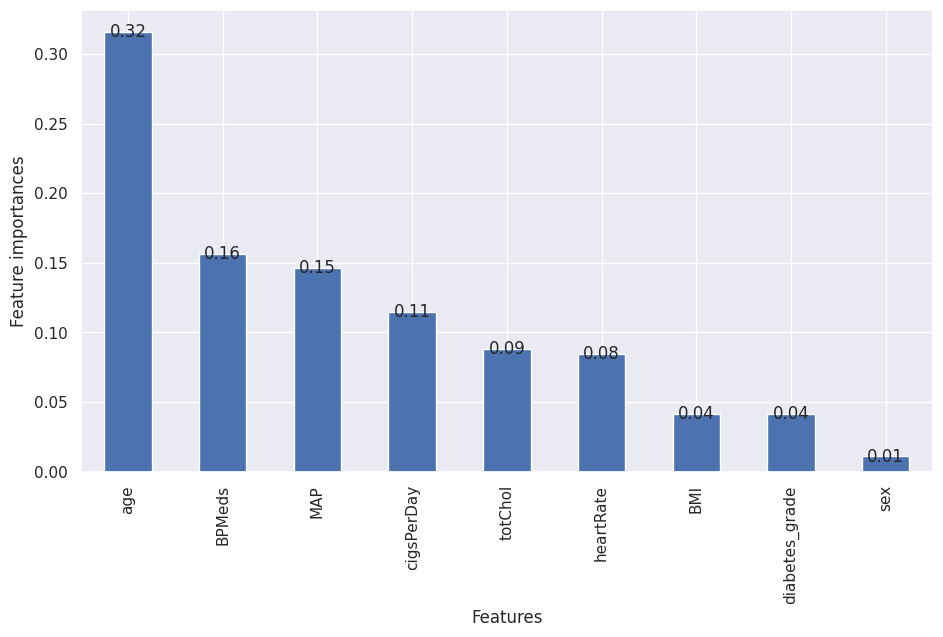

In [ ]:
# Displaying Feature Importances
rf_importances = pd.Series(rf_model.feature_importances_, index = X.columns)
plt.figure(figsize = (11, 6))
ax = rf_importances.sort_values(ascending = False).plot(kind = 'bar')
ax.set(xlabel = 'Features', ylabel = 'Feature importances')
display_vals(ax)

In [ ]:
for score in rf_scores:
  scores[score].append(rf_scores[score] * 100)

**ML Model - 7 - XGBoost**

In [ ]:
# Defining the Hyperparameters
params_xgb = {
              'n_estimators':[50, 100],
              'max_depth':[3, 4],
              'learning_rate':[0.01, 0.02]
              }

xgb_model = xgb.XGBClassifier(random_state = 42)
xgb_models = GridSearchCV(xgb_model, params_xgb, cv = cv, scoring = scorer)

Best model parameters are: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Best model score is: 0.788684648998711



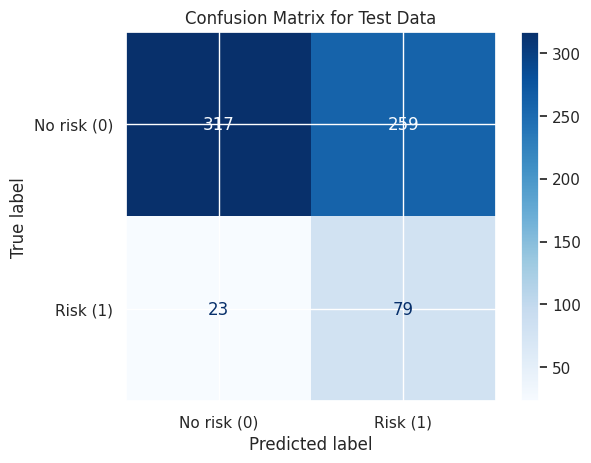

CPU times: user 1min 1s, sys: 445 ms, total: 1min 1s
Wall time: 39 s


In [ ]:
# Training the model
%%time
xgb_scores, xgb_test_preds, xgb_model = model_train_test(xgb_models, X_train_final, Y_train_final, X_test_final, Y_test, gs = True)

In [ ]:
# Classification Report
print(classification_report(Y_test, xgb_test_preds, target_names=['class-0', 'class-1']))

              precision    recall  f1-score   support

     class-0       0.93      0.55      0.69       576
     class-1       0.23      0.77      0.36       102

    accuracy                           0.58       678
   macro avg       0.58      0.66      0.53       678
weighted avg       0.83      0.58      0.64       678



In [ ]:
# Printing model scores
print_scores(model_name = model_names[6], model_scores = xgb_scores)

The train and test recalls of the XGBoost Model are: 80.2% and 77.45% respectively
The train and test ROC-AUC scores of the XGBoost Model are: 67.39% and 66.24% respectively


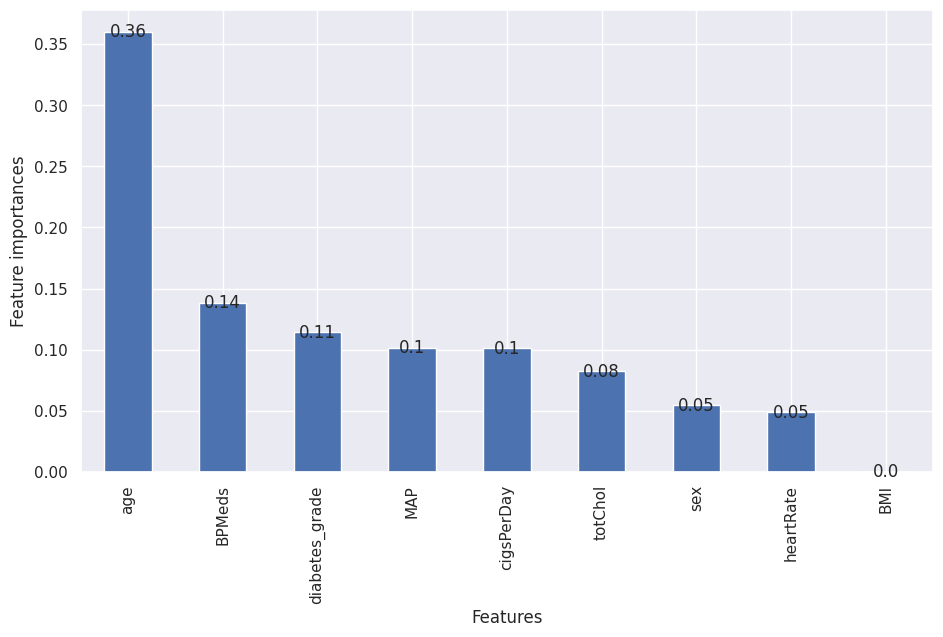

In [ ]:
# Displaying feature importances
xgb_importances = pd.Series(xgb_model.feature_importances_, index = X.columns)
plt.figure(figsize = (11, 6))
ax = xgb_importances.sort_values(ascending = False).plot(kind = 'bar')
ax.set(xlabel = 'Features', ylabel = 'Feature importances')
display_vals(ax)

In [ ]:
for score in xgb_scores:
  scores[score].append(xgb_scores[score] * 100)

In [ ]:
# Comparing the evaluation metrics from each model
results_df = pd.DataFrame(scores, index = model_names)
styler_list = [
                {'selector': 'th','props': [('border', '2px solid black')]},
                {'selector': 'td','props': [('border', '2px solid black')]}
              ]
styler = results_df.style.set_table_styles(styler_list)
display(styler)


,Train Recall,Test Recall,Train ROC-AUC,Test ROC-AUC
Logistic Regression,66.999566,69.607843,65.848893,68.658088
Naive Bayes,51.584889,52.941176,63.482414,64.751838
Decision Tree,90.186713,87.254902,66.217977,64.547590
KNN,80.373426,71.568627,70.321320,64.777369
SVM,70.777247,73.529412,65.848893,68.361928
Random Forest,78.983934,67.647059,72.275293,65.767974
XGBoost,80.199739,77.450980,67.390360,66.242851


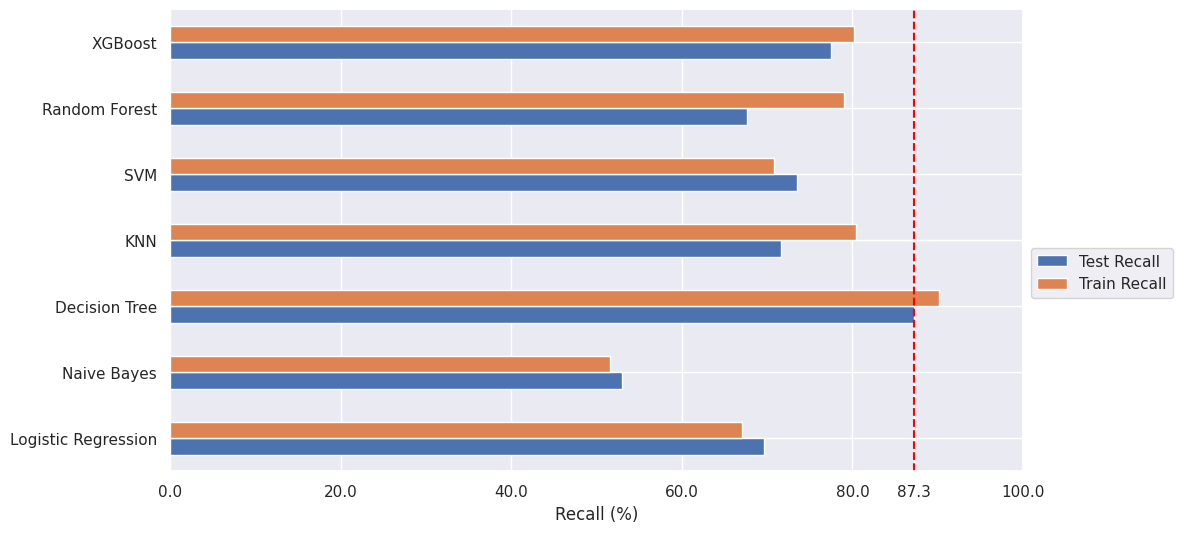


The model with maximum Test Recall is the Decision Tree model


In [ ]:
# Plotting the train and test Recalls and choosing optimum model
results_df[['Test Recall', 'Train Recall']].plot(kind = 'barh', figsize = (11, 6))
plt.xlabel('Recall (%)')
plt.xlim((0, 100))
plt.xticks([0, 20, 40, 60, 80, 100, results_df['Test Recall'].max()])
plt.axvline(results_df['Test Recall'].max(), color = 'red', linestyle = '--')
plt.legend(bbox_to_anchor = (1, 0.5))
plt.show()

best_model = results_df[results_df['Test Recall'] == results_df['Test Recall'].max()].index[0]
print(f'\nThe model with maximum Test Recall is the {best_model} model')


The model with maximum Test Recall is the Decision Tree model

The Decision Tree Model is the best model in this case when compared on the basis of Test Recall.

It is to be noted that, while this model may not have the highest Test ROC-AUC score, almost all the models scored at a similar range in this metric (~65%). Hence, only comparing the Test Recalls would be apt in this case. **bold text**

In [ ]:
X_test.head(25)

,age,sex,cigsPerDay,BPMeds,totChol,BMI,heartRate,MAP,diabetes_grade
2551,48,1,35.0,0.0,263.0,40.08,90.0,104.666667,2
1982,57,0,0.0,0.0,274.0,25.77,70.0,94.000000,2
1408,64,0,0.0,0.0,305.0,25.77,67.0,86.833333,1
1242,53,0,0.0,0.0,272.0,25.50,73.0,108.000000,1
1841,56,0,30.0,0.0,288.0,18.62,72.0,87.666667,2
495,57,0,10.0,0.0,238.0,18.09,100.0,92.333333,3
2704,60,1,20.0,1.0,269.0,29.59,60.0,123.333333,2
279,38,0,9.0,0.0,224.0,18.18,75.0,76.666667,1
1052,43,1,0.0,0.0,262.0,24.01,85.0,93.000000,2
2144,38,1,0.0,0.0,198.0,30.27,68.0,88.333333,1


In [ ]:
Y_test.head(25)

2551    1
1982    0
1408    1
1242    0
1841    0
495     0
2704    1
279     0
1052    0
2144    0
519     0
2090    0
2826    0
310     0
969     0
1809    0
1727    0
479     0
2775    0
1966    0
862     0
3066    0
2012    1
3156    0
1701    1
Name: TenYearCHD, dtype: int64

In [ ]:
# Picking any particular observation for local analysis
obs = 2
print(f'The actual class of TenYearCHD of this observation is {Y_test.iloc[obs]}.\nThe predicted class is {dt_test_preds[obs]}.\nThe data of the patient is:\n')
print(X_test.iloc[obs])

The actual class of TenYearCHD of this observation is 1.
The predicted class is 1.
The data of the patient is:

age                64.000000
sex                 0.000000
cigsPerDay          0.000000
BPMeds              0.000000
totChol           305.000000
BMI                25.770000
heartRate          67.000000
MAP                86.833333
diabetes_grade      1.000000
Name: 1408, dtype: float64


In [ ]:
# Picking any particular observation for local analysis
obs = 8
print(f'The actual class of TenYearCHD of this observation is {Y_test.iloc[obs]}.\nThe predicted class is {dt_test_preds[obs]}.\nThe data of the patient is:\n')
print(X_test.iloc[obs])

The actual class of TenYearCHD of this observation is 0.
The predicted class is 0.
The data of the patient is:

age                43.00
sex                 1.00
cigsPerDay          0.00
BPMeds              0.00
totChol           262.00
BMI                24.01
heartRate          85.00
MAP                93.00
diabetes_grade      2.00
Name: 1052, dtype: float64


In [ ]:
input_data=(43,1,0,0,262,24,85,93,2)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=dt_model.predict(input_data_reshaped)
print(prediction)

if(prediction[0] == 0):
  print("The person is unlikely to have a heart Disease")
else:
  print("The person is likely to have a heart Disease")

[1]
The person is likely to have a heart Disease


In [ ]:
import pickle


In [ ]:
filename='Final_model.sav'
pickle.dump(dt_model,open(filename,'wb'))

In [ ]:
loaded_model=pickle.load(open('Final_model.sav','rb'))